# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 
Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. 
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

В ходе работы над проектом ответим на вопросы: 

- сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам, какой период полнее всего представлен в данных.

- как менялась динамика проката по годам. 

- посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения и сделаем выводы.

- влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

- исследуем фильмы, которые получили государственную поддержку. Посмотрим, сколько выделяется средств на поддержку кино, хорошо ли окупаются такие фильмы, какой у них рейтинг. 

**Для проведения анализа представлено 2 таблицы:**

`mkrf_movies` с информацией из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Содержит 7486 строк в 15 столбцах: 

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

`mkrf_shows`, содержащая сведения о показах фильмов в российских кинотеатрах. Содержит 3158 строк в 2 столбцах:

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

## Откроем файлы с данными и объединим их в один датафрейм

In [95]:
# импортируем библиотеки
import pandas as pd
pd.set_option('display.max_columns', None) # служебная строка для печати всех столбцов таблицы на экран
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)


In [96]:
# открываем файлы
try:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    mkrf_movies = pd.read_csv('C:\\python\\datasets\\mkrf_movies.csv')
    mkrf_shows = pd.read_csv('C:\\python\\datasets\\mkrf_shows.csv')

**Создадим функцию для вывода основной информации о датафрейме**

In [97]:
def information_data(data):
    display('Первые десять строк датафрейма:')
    display(data.head(10))
    display()
    display('Общая информация о датафрейме:')
    display(data.info())
    display()
    display('Описание данных:')
    display(data.describe())
    display()
    display('Количество пропусков:')
    display(data.isna().sum())
    display()
    display('Количество дубликатов:')
    display(data.duplicated().sum())

**Посмотрим основную информацию о датафрейме <code>mkrf_movies</code>:**

In [98]:
information_data(mkrf_movies)

'Первые десять строк датафрейма:'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


'Общая информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

'Описание данных:'

,refundable_support,nonrefundable_support,budget
count,332.00,332.00,332.00
mean,11864457.83,48980988.89,127229716.68
std,24916555.26,59980117.92,188588333.12
min,0.00,0.00,0.00
25%,0.00,25000000.00,42000000.00
50%,0.00,30000000.00,68649916.00
75%,15000000.00,40375000.00,141985319.50
max,180000000.00,400000000.00,2305074303.00


'Количество пропусков:'

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

'Количество дубликатов:'

0

**Выведем основную информацию о датафрейме <code>mkrf_shows</code>:**

In [99]:
information_data(mkrf_shows)

'Первые десять строк датафрейма:'

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79
5,111000119,4293649.51
6,111000212,200.00
7,111000216,355567.00
8,111000313,710.00
9,111000314,1607970.00


'Общая информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

'Описание данных:'

,puNumber,box_office
count,3158.00,3158.00
mean,120187475.32,76478696.16
std,12383941.15,240353122.82
min,111000113.00,0.00
25%,113000191.75,86239.00
50%,121013114.50,2327987.55
75%,121028317.75,23979671.02
max,224026410.00,3073568690.79


'Количество пропусков:'

puNumber      0
box_office    0
dtype: int64

'Количество дубликатов:'

0

**В таблицах есть общий столбец, по которому можно выполнить объединение, однако в таблице <code>mkrf_movies</code> столбец имеет тип данных <code>object</code>, а в таблице <code>mkrf_shows</code> — <code>int64</code>. Для объединения таблиц нужно привести столбец к единому типу данных. Так как номера прокатных удостоверений представляют собой 9-значное число, приведем к целочисленному типу <code>int64</code>. Сначала проверим, есть ли в стобце <code>puNumber</code> таблицы <code>mkrf_movies</code> нечисловые значения или символы:**

In [100]:
mkrf_movies[mkrf_movies['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**В строке 804 "Паранормальный Якутск" в значение номера прокатного удостоверения попал пробел, а строка 1797 "Курбан-роман. (История с жертвой)" в колонке <code>puNumber</code> имеет строковое значение. Методом <code>to_numeric</code> приведем значение строки 804 к числовому формату, а метод обработки ошибок <code>errors='coerce'</code> заменит значение "нет" на NaN. Эту строку удалим, на результат исследования это не повлияет. Сразу же проверим результат.**

In [101]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')
mkrf_movies = mkrf_movies.dropna(subset=['puNumber'])
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: float6

**Видим, что одна строка удалена, а тип данных колонки <code>puNumber</code> изменился на <code>float64</code>. Приведем тип данных к <code>int64</code> и объединим таблицы.**

In [102]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64') 

In [103]:
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

Смотрим результат:

In [104]:
information_data(df)

'Первые десять строк датафрейма:'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


'Общая информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

'Описание данных:'

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7485.00,332.00,332.00,332.00,3158.00
mean,135196587.56,11864457.83,48980988.89,127229716.68,76478696.16
std,38352919.34,24916555.26,59980117.92,188588333.12,240353122.82
min,1811096.00,0.00,0.00,0.00,0.00
25%,112025118.00,0.00,25000000.00,42000000.00,86239.00
50%,121015510.00,0.00,30000000.00,68649916.00,2327987.55
75%,124003314.00,15000000.00,40375000.00,141985319.50,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,3073568690.79


'Количество пропусков:'

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

'Количество дубликатов:'

0

**Таблицы объединены, появился новый столбец <code>box_office</code>, в котором имеется 3158 строк. Для более аккуратного вида и удобства дальнейшей работы с датафреймом переименуем столбец <code>puNumber</code> в <code>pu_number</code>.**

In [105]:
df = df.rename(columns={'puNumber': 'pu_number'})

Вводим переменную <code>old_size</code> для того, чтобы после удаления пропусков и аномалий посчитать отношение нового размера датафрейма к старому.

In [106]:
old_size = df.shape[0] # сохраняем размер датафрейма до изменений

### Описание данных

**Таблица df в 16 столбцах содержит информацию из реестра прокатных удостоверений и сведения о показах фильмов в российских кинотеатрах (колонка box_office). У одного фильма может быть несколько прокатных удостоверений.**

- title — название фильма;
- pu_number — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма (включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку);
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- box_office — сборы в рублях.


**Посмотрим отношение количества пропусков в каждом столбце к общему количеству строк таблицы:**

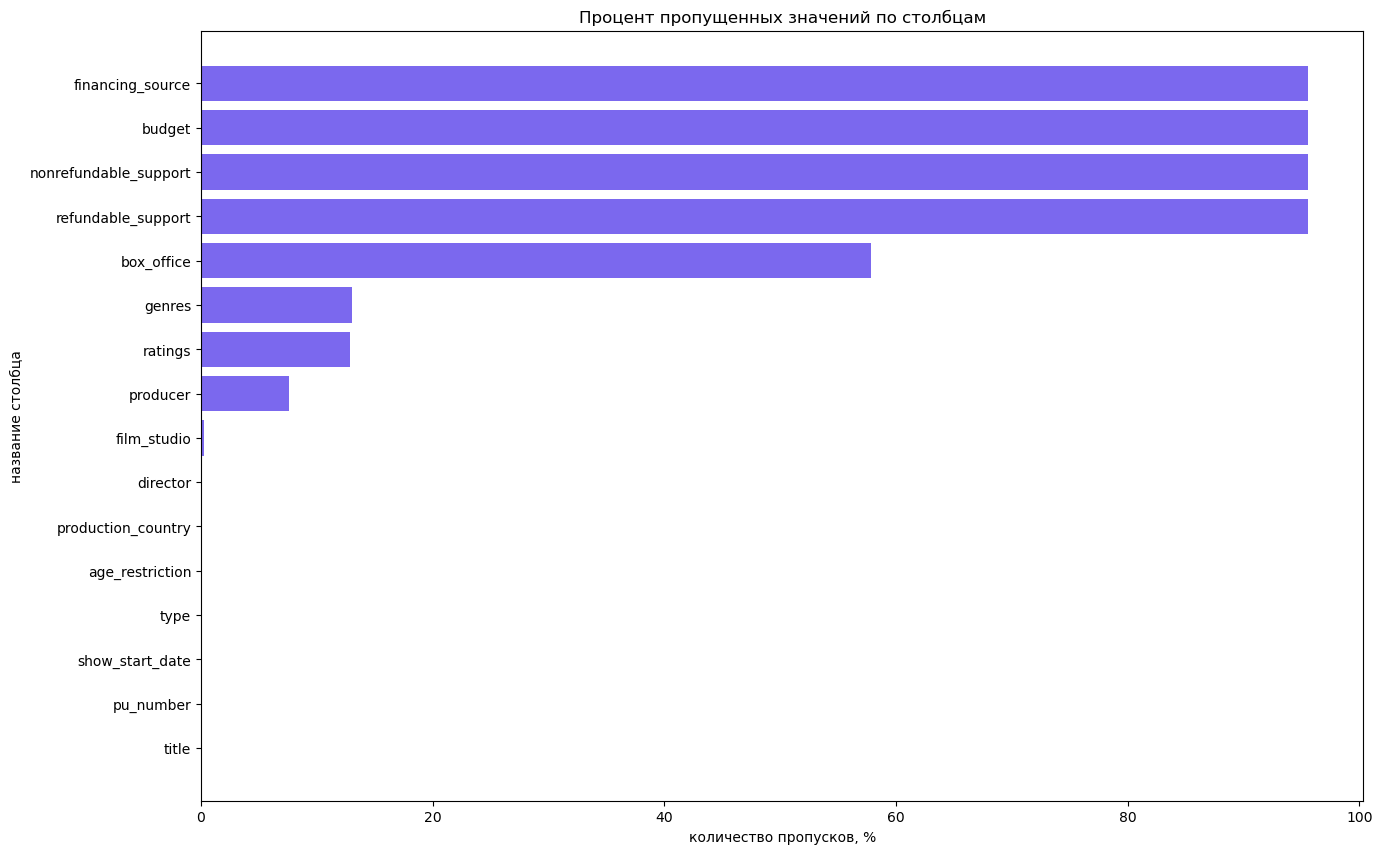

In [107]:
missing_data = (df.isna().sum() / len(df) * 100).sort_values() # рассчитываем % пропущенных значений для каждого столбца
plt.figure(figsize=(15,10))
plt.title('Процент пропущенных значений по столбцам')
plt.xlabel('количество пропусков, %')
plt.ylabel('название столбца')
plt.barh(missing_data.index, missing_data, color='mediumslateblue');

plt.show()

In [108]:
display('Количество пропусков в столбцах, %', missing_data.sort_values(ascending=False))

'Количество пропусков в столбцах, %'

refundable_support      95.56
nonrefundable_support   95.56
budget                  95.56
financing_source        95.56
box_office              57.81
genres                  13.03
ratings                 12.91
producer                 7.59
film_studio              0.24
director                 0.12
production_country       0.03
title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
age_restriction          0.00
dtype: float64

### Вывод

**Для проведения анализа представлено 2 таблицы:**
- <code>mkrf_movies</code> с информацией из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Содержит 15 столбцов и 7486 строк;
- <code>mkrf_shows</code>, содержащая сведения о показах фильмов в российских кинотеатрах. Содержит 2 столбца и 3158 строк. 

Для объединения таблиц использовался столбец <code>puNumber</code>, содержащий информацию о номере прокатного удостоверения. Так как в датафреймах указанный столбец имел несовпадающий тип данных (в <code>mkrf_movies</code> — <code>object</code>, в <code>mkrf_shows</code> — <code>int64</code>), предварительно была проведена проверка на наличие нечисловых значений столбца в таблице <code>mkrf_movies</code>. Обнаруженные некорректные данные в двух строках были исправлены (одна строка содержала лишний пробел, вторая строка не содержала номера прокатного удостоверения и была удалена). После приведения столбца <code>puNumber</code> таблицы <code>mkrf_movies</code> к типу данных <code>int64</code> был создан объединенный датафрейм <code>df</code>.
Объединенная таблица <code>df</code> имеет 16 столбцов и 7485 строк. 
Имеются пропуски:
4 столбца — <code>refundable_support</code>, <code>nonrefundable_support</code> (объём возвратных и невозвратных средств государственной поддержки), <code>financing_source</code> — источник государственного финансирования, <code>budget</code> имеют 95 % пропусков. Пропуски в этих столбцах означают, что фильм был снят без государственной поддержки. На следующем этапе мы обработаем их, заполнив нулями, а столбец <code>financing_source</code> — значением "Частное производство". 

Столбец <code>box_office</code> содержит 58 % пропусков. Он содержит сведения о показах фильмов в российских кинотеатрах (сборы в рублях). Пропуски могут означать, что фильм не выходил в кинотеатрах, либо отсутствие информации. Будем заполнять пропуски нулями.

Столбцы <code>ratings</code> и <code>genres</code> имеют 13 % и 12 % пропусков соответственно. Заполнить данными из соседних столбцов не получится, поэтому пропуски будем заполнять нулями и "Нет данных".

В столбце <code>producer</code> 7,6 % пропусков. Возможно, это означает, что в этих фильмах режиссер одновременно был и продюсером, либо что данных нет. Во избежание заполнения пропусков некорректными значениями, проставим здесь "Нет данных". 

Еще несколько столбцов содержат менее 1 % пропусков: <code>production_country</code>, <code>director</code>, <code>film_studio</code>. 

Явных дубликатов в данных нет. Неявные дубликаты обработаем на этапе предобработки данных.

Требуется изменение типов данных в следующих столбцах:

- <code>show_start_date</code> так как содержит данные о дате премьеры фильма, для удобства дальнейшей работы приведем к типу данных <code>datetime64</code>;

- <code>ratings</code> к типу <code>float64</code>, так как содержит данные о рейтинге фильма, которые обычно записываются в виде числа от 0 до 10. Это пригодится для анализа фильмов, получивших государственную поддержку.

## Предобработка данных

**На этапе предварительной обработки данных выполним следующие шаги:**

- проверим типы данных и заменим, где требуется, на корректные;
- изучим пропуски в датафрейме и попробуем найти подходящую замену;
- изучим и по возможности устраним неявные дубликаты в датафрейме;
- изучим категориальные значения;
- проверим количественные значения;
- добавим новые столбцы: с информацией о годе проката <code>year_of_issue</code>, с именем и фамилией главного режиссёра <code>main_director</code> и основным жанром фильма <code>main_genres</code>, долей от общего бюджета фильма составляет государственная поддержка <code>support_part</code>.

### Проверьте типы данных


**Требуется изменение типов данных в следующих столбцах:**

- <code>show_start_date</code> содержит информацию о дате премьеры фильма и имеет тип данных <code>object</code>. Приведем значения столбца к формату <code>datetime64</code> для удобства дальнейшей работы;

- <code>ratings</code> к типу <code>float64</code>, так как содержит данные о рейтинге фильма, которые обычно записываются в виде числа от 0 до 10. Это пригодится для анализа фильмов, получивших государственную поддержку.

In [109]:
df['show_start_date'] = pd.to_datetime(df['show_start_date']) # приводим к типу данных datetime64

Для приведения столбца ratings к вещественному типу данных посмотрим уникальные значения:

In [110]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Обычно рейтинг фильма записывают в виде десятичной дроби от 0 до 10, но в данных имеются также значения в процентах. Удалим знак "%" и разделим значение на 10 для приведения рейтинга к привычному виду. Приведем к типу данных float64.

In [111]:
df['ratings'] = df['ratings'].str.replace('%', '') # удаляем знак %

In [112]:
df['ratings'] = df['ratings'].astype('float64') # приводим к вещественному типу данных
# приводим процентные значения к привычному виду рейтинговой оценки
df.loc[df['ratings'] > 10, 'ratings'] /= 10 

Проверим результат:

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Все обработалось корректно.

### Изучите пропуски в датафрейме

Посмотрим еще раз на количество пропусков в каждом столбце датафрейма

In [114]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
box_office               4327
genres                    975
ratings                   966
producer                  568
film_studio                18
director                    9
production_country          2
dtype: int64

**Пропуски имеются в столбцах:**
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- budget — общий бюджет фильма;
- financing_source — источник государственного финансирования;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- box_office — сборы в рублях.

**В наборе данных есть пропущенные значения, которые могут быть результатом отсутствия информации во время сбора данных или ошибок ввода. Посмотрим более детально на пропуски в данных и попробуем заполнить:** 


In [115]:
df[df['film_studio'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные о студии-производителе фильма не получится заполнить информацией из других столбцов, поэтому заменим пропуски на "Нет данных"

In [116]:
df[df['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


По имеющимся данным предположить страну производства невозможно, здесь также заменим пропуски на "Нет данных"

In [117]:
df[df['director'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df[df['producer'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN


Пропуски в столбцах director и producer	заполним значением "Нет данных". Можно предположить, что если указан режиссер и не указан продюсер, то это один и тот же человек, но это не обязательно так, а заполнять пропуски недостоверными значениями не хотелось бы.

In [119]:
df[df['refundable_support'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


In [120]:
df[df['nonrefundable_support'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


In [121]:
df[df['financing_source'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


In [122]:
df[df['budget'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


В методе info() можно заметить, что количество пропусков в столбцах refundable_support (объём возвратных средств государственной поддержки), nonrefundable_support (объём невозвратных средств государственной поддержки), financing_source (источник государственного финансирования) и budget (общий бюджет фильма) совпадает. Пропуски в этих столбцах означают, что фильм был снят без государственной поддержки. 

Заменим пропуски refundable_support, nonrefundable_support и budget на 0 для сохранения вещественного типа данных, а financing_source — на "Частное производство".

In [123]:
df[df['ratings'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в колонке ratings могут означать, что фильм не собрал достаточно оценок на Кинопоиске для выставления рейтинга. Заполнять какими-либо средними значениями было бы некорректно, поэтому заполним нулями.

In [124]:
df[df['genres'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Предположить жанр не получится, поэтому заполним здесть пропуски значением "Нет данных".

In [125]:
df[df['box_office'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


Пропуски в колонке box_office — сборы в рублях могут означать отсутствие данных, либо что фильм не выходил в прокат в России. Заменим пропуски нулями.

Итак, 

"Нет данных": 
- film_studio
- production_country
- director
- producer
- genres

"0":
- refundable_support
- nonrefundable_support
- ratings
- budget
- box_office

"Частное производство":
- financing_source

In [126]:
df[['film_studio', 'production_country', 'director', 'producer', 'genres']] = df[
    ['film_studio', 
     'production_country', 
     'director', 
     'producer', 
     'genres']
].fillna('Нет данных')

In [127]:
df[['refundable_support', 'nonrefundable_support', 'ratings', 'budget', 'box_office']] = df[
    ['refundable_support', 
     'nonrefundable_support',
     'ratings',
     'budget',
     'box_office']
].fillna(0)

In [128]:
df['financing_source'] = df['financing_source'].fillna('Частное производство')

**Проверяем результат:**

In [129]:
df.isna().sum()

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

In [130]:
df.head(15)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Частное производство,7.20,"боевик,драма,мелодрама",0.00
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет данных,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Частное производство,6.60,"драма,военный",0.00
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Частное производство,6.80,"фантастика,боевик,триллер",0.00
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Частное производство,6.80,"фантастика,боевик,триллер",0.00
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Частное производство,6.80,"фантастика,боевик,триллер",0.00
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Нет данных,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Частное производство,7.70,драма,0.00
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Нет данных,«12+» - для детей старше 12 лет,0.00,0.00,0.00,Частное производство,8.30,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.00,0.00,0.00,Частное производство,6.60,"мюзикл,мелодрама,комедия",0.00
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.00,0.00,0.00,Частное производство,8.00,"комедия,криминал",0.00
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,Нет данных,«12+» - для детей старше 12 лет,0.00,0.00,0.00,Частное производство,7.80,"мелодрама,комедия",0.00


### Изучите дубликаты в датафрейме
Посмотрим, есть ли в датафрейме строки-дубликаты, а потом рассмотрим по отдельности столбцы: 

- title
- pu_number

Проверим столбцы на предмет наличия неявных дубликатов:

- type
- film_studio
- production_country
- director
- producer
- age_restriction
- financing_source
- genres

В остальных столбцах могут быть повторяющиеся значения, которые не являются дубликатами. Например, может совпадать дата премьеры фильма или объем государственной поддержки и так далее.

In [131]:
df.duplicated().sum()

0

Дублирующихся строк нет, посмотрим теперь стобец с названием фильма.

In [132]:
df['title'].value_counts().loc[(df['title'].value_counts()) > 1]

title
День святого Валентина_                          5
Белоснежка и охотник                             4
Красавчик-2                                      4
Рапунцель: Запутанная история                    4
Кошмар на улице Вязов /Фильм ужасов/             4
                                                ..
Инопланетное вторжение: Битва за Лос-Анджелес    2
Посейдон                                         2
Паранормальное явление 3                         2
Моя маленькая принцесса                          2
Серьезный человек                                2
Name: count, Length: 558, dtype: int64

558 повторяющихся наименований. Разберем подробнее первые несколько строк. 

In [133]:
df[df['title'] == 'День святого Валентина_']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.70,"мелодрама,комедия",0.00
3990,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.70,"мелодрама,комедия",0.00
4069,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.70,"мелодрама,комедия",0.00
4195,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.70,"мелодрама,комедия",0.00
5069,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.70,"мелодрама,комедия",0.00


In [134]:
df[df['title'] == 'Белоснежка и охотник']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
445,Белоснежка и охотник,221030916,2016-06-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.00,"фэнтези,боевик,драма",0.00
446,Белоснежка и охотник,121013012,2012-05-25 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.00,"фэнтези,боевик,драма",470427.00
447,Белоснежка и охотник,221053712,2012-07-17 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.00,"фэнтези,боевик,драма",0.00
448,Белоснежка и охотник,221077812,2012-12-11 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,6.00,"фэнтези,боевик,драма",0.00


In [135]:
df[df['title'] == 'Красавчик-2']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
341,Красавчик-2,221011215,2015-04-03 12:00:00+00:00,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.10,"мелодрама,комедия",0.00
4356,Красавчик-2,221060010,2010-05-12 12:00:00+00:00,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.10,"мелодрама,комедия",0.00
4386,Красавчик-2,121006110,2010-03-30 12:00:00+00:00,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.10,"мелодрама,комедия",0.00
4614,Красавчик-2,221161610,2010-12-17 12:00:00+00:00,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.10,"мелодрама,комедия",0.00


Фильмы "День святого Валентина", "Белоснежка и охотник" и "Красавчик-2" встречаются в таблице 5 и 4 раза, при этом имеют разные номера прокатного удостоверения и дату премьеры. Возможно, фильм запускался в прокат несколько раз, возможно, прокатное удостоверение выдавалось под разные цели, либо после внесения изменений в ленту (например, удаление некоторых сцен). Посмотрим, есть ли в данных строки с совпадающими: 

- названием и датой премьеры,
- названием и номером прокатного удостоверения.

In [136]:
len(df[df.duplicated(subset=['title', 'show_start_date'], keep=False)])

16

In [137]:
df[df.duplicated(subset=['title', 'show_start_date'], keep=False)] # проверяем фильмы с одинаковым названием и датой премьеры

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,3.50,"комедия,приключения",0.00
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,3.50,"комедия,приключения",0.00
2190,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,5.70,"мюзикл,драма,мелодрама",0.00
2191,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,5.70,"мюзикл,драма,мелодрама",52495.00
2751,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Частное производство,5.20,"мультфильм,семейный,спорт",1360.00
2752,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Частное производство,5.20,"мультфильм,семейный,спорт",14152495.90
3085,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,5.70,драма,0.00
3086,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,5.70,драма,332371.00


In [138]:
# проверяем фильмы с одинаковым названием и номером прокатного удостоверения
len(df[df.duplicated(subset=['title', 'pu_number'], keep=False)]) 

0

Видим в данных 8 фильмов с совпадающей датой премьеры, но у всех различные номера прокатного удостоверения. Оставим как есть, возможно, как было указано выше, прокатное удостоверение выдавалось под разные цели. Фильмов с одинаковыми названиями и номерами прокатного удостоверения нет.

Посмотрим, есть ли фильмы с совпадающими номерами прокатного удостоверения.

In [139]:
df[df['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.00,"мелодрама,комедия",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.60,"драма,мелодрама,история",0.00
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Частное производство,7.40,"комедия,криминал",0.00
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Частное производство,6.80,"комедия,криминал",0.00


Два фильма с одинаковыми номерами прокатного удостоверения. 4 строки на результат анализа не повлияют, оставим пока как есть, но будем иметь это виду. 

### Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах

Проверим столбцы type, film_studio, production_country, director, producer, age_restriction, financing_source, genres на наличие неявных дубликатов.

In [140]:
df['type'].value_counts()

type
Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

Встречаются неявные дубликаты из-за лишнего пробела в названии типа фильма. Обработаем их, удалив невидимые символы методом <code>strip()</code>

Посмотрим поближе на столбцы <code>'film_studio'</code>, <code>'production_country'</code>, <code>'director'</code>, <code>'producer'</code>, <code>'genres'</code>.

In [141]:
for column in ['film_studio', 'production_country', 'director', 'producer', 'genres']:
    print(f'Уникальные значения столбца {column}:')
    print(df[column].unique())
    print()

Уникальные значения столбца film_studio:
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']

Уникальные значения столбца production_country:
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 

Посмотрим количество уникальных значений в столбцах: <code>'film_studio'</code>, <code>'production_country'</code>, <code>'director'</code>, <code>'producer'</code>, <code>'genres'</code>.

In [142]:
df[['film_studio', 'production_country', 'director', 'producer', 'genres']].apply(pd.Series.nunique)

film_studio           5491
production_country     951
director              4812
producer              5350
genres                 743
dtype: int64

Удалим лишние невидимые символы в этих столбцах:

In [143]:
df[['film_studio', 'production_country', 'director', 'producer', 'genres', 'type']] = df[
    ['film_studio',
     'production_country', 
     'director', 
     'producer', 
     'genres',
    'type']
].apply(lambda x: x.str.strip())

In [144]:
# проверяем результат
df[['film_studio', 'production_country', 'director', 'producer', 'genres', 'type']].apply(pd.Series.nunique)

film_studio           5463
production_country     935
director              4802
producer              5335
genres                 743
type                     6
dtype: int64

Посмотрим столбцы с возрастным ограничением <code>age_restriction</code> и источником финансирования <code>financing_source</code>.

In [145]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [146]:
df['financing_source'].unique()

array(['Частное производство', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

В столбцах с возрастным ограничением <code>age_restriction</code> и источником финансирования <code>financing_source</code> все в порядке, неявных дубликатов не обнаружено. Столбцы <code>'film_studio'</code>, <code>'production_country'</code>, <code>'director'</code>, <code>'producer'</code>, <code>'genres'</code>, <code>'type'</code> были обработаны путем удаления невидимых символов. Более детальный разбор этих столбцов проводить не будем в связи с тем, что на анализ это не повлияет, а на дальнейшем этапе предобработки будут добавлены столбцы с главным режиссером и основным жанром. 

В столбцах, содержащих категориальные данные, часто встречается такая проблема как неодинаковый подход к записи данных. Например, информация о стране-производителе может быть записана с использованием разных разделителей, таких как дефис или запятая, а также могут присутствовать пробелы после страны. В столбце <code>type</code> обнаружены пробелы в начале значений. В названиях фильмов также замечены различия в орфографии: иногда используются знаки препинания. Таким образом, помимо проблем с пропущенными значениями, выявленными на ранних этапах анализа, существует и проблема с неоднородностью существующих данных: значения в одном и том же столбце могут иметь разные форматы записи.

### Проверьте количественные значения

Обратимся еще раз к описанию данных:

<code>refundable_support</code> — объём возвратных средств государственной поддержки;

<code>nonrefundable_support</code> — объём невозвратных средств государственной поддержки;

<code>financing_source</code>— источник государственного финансирования;

<code>budget</code> — общий бюджет фильма. Столбец включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Ранее, при обработке пропусков, мы обратили внимание, что количество пропусков в данных столбцах совпадает. 

- refundable_support       7153
- nonrefundable_support    7153
- budget                   7153
- financing_source         7153

Посмотрим более детально:

In [147]:
df.loc[df['financing_source'] != 'Частное производство', [
    'refundable_support', 
    'nonrefundable_support', 
    'budget', 
    'financing_source'
]].head(15)
# посмотрим первые 15 строк среза

,refundable_support,nonrefundable_support,budget,financing_source
1281,0.00,26500000.00,79411900.00,Министерство культуры
1448,0.00,26000000.00,37142857.00,Министерство культуры
1498,0.00,107847945.00,176023490.00,Фонд кино
1524,0.00,28000000.00,40574140.00,Министерство культуры
1792,0.00,25000000.00,40015122.00,Министерство культуры
1853,0.00,25000000.00,51850000.00,Министерство культуры
1869,50000000.00,100000000.00,220588394.00,Фонд кино
1870,0.00,46502299.00,86210067.00,"Министерство культуры, Фонд кино"
1902,0.00,75000000.00,139551503.00,Фонд кино
1911,0.00,34000000.00,48571430.00,Министерство культуры


In [148]:
# посмотрим строки, в которых источником финансирования не является частное производство и бюджет равен нулю
df.query('budget == 0 and financing_source != "Частное производство"') 


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


In [149]:
len(df.query('budget == 0 and financing_source != "Частное производство"')) # посмотрим количество таких строк

17

Для 17 фильмов, созданных при поддержке государства, не указан размер бюджета, при этом столбцы refundable_support и nonrefundable_support заполнены. 

Добавим в таблицу столбец с долей государственной поддержки от общей суммы бюджета фильма, рассчитаем медианное значение по этому столбцу.

In [150]:
df['support_part'] = np.where(df['budget'] != 0, (df['refundable_support'] + 
                                                  df['nonrefundable_support']) / df['budget'], 0)

In [151]:
support_part = df.loc[df['support_part'] != 0, 'support_part'].median()
display(f'Медианное значение доли государственной поддержки фильмов составляет {round(support_part*100, 2)} %')

'Медианное значение доли государственной поддержки фильмов составляет 59.23 %'

Рассчитаем размер бюджета для фильмов, созданных с гос.поддержкой.

In [152]:
df['budget'] = (df['budget'].where(df['budget'] != 0, (df['refundable_support'] + 
                                                       df['nonrefundable_support']) / support_part)).round(2)

In [153]:
len(df.query('budget == 0 and financing_source != "Частное производство"')) # проверяем результат

0

In [154]:
df.loc[df['financing_source'] != 'Частное производство', [
    'refundable_support', 
    'nonrefundable_support', 
    'budget', 
    'support_part', 
    'financing_source'
]].head(15)

,refundable_support,nonrefundable_support,budget,support_part,financing_source
1281,0.00,26500000.00,79411900.00,0.33,Министерство культуры
1448,0.00,26000000.00,37142857.00,0.70,Министерство культуры
1498,0.00,107847945.00,176023490.00,0.61,Фонд кино
1524,0.00,28000000.00,40574140.00,0.69,Министерство культуры
1792,0.00,25000000.00,40015122.00,0.62,Министерство культуры
1853,0.00,25000000.00,51850000.00,0.48,Министерство культуры
1869,50000000.00,100000000.00,220588394.00,0.68,Фонд кино
1870,0.00,46502299.00,86210067.00,0.54,"Министерство культуры, Фонд кино"
1902,0.00,75000000.00,139551503.00,0.54,Фонд кино
1911,0.00,34000000.00,48571430.00,0.70,Министерство культуры


### Добавьте новые столбцы





- Создадим столбец с информацией о годе проката, выделив год из даты премьеры фильма.

In [155]:
df['year_of_issue'] = df['show_start_date'].dt.year # добавляем столбец

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно. Чтобы создать такие столбцы, лучше всего использовать функцию. 

In [156]:
def new_columns (data, columns): # создаем функцию
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

df = new_columns(df, ['director', 'genres']) # применяем к датафрейму

In [157]:
df[['title', 'show_start_date', 'year_of_issue', 'main_director', 'main_genres']].head(10) # проверяем результат

,title,show_start_date,year_of_issue,main_director,main_genres
0,Открытый простор,2015-11-27 12:00:00+00:00,2015,Кевин Костнер,боевик
1,Особо важное задание,2016-09-13 12:00:00+00:00,2016,Е.Матвеев,драма
2,Особо опасен,2016-10-10 12:00:00+00:00,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,2016-06-10 12:00:00+00:00,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,2015-07-29 12:00:00+00:00,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,2016-09-13 12:00:00+00:00,2016,В.Абдрашитов,драма
6,Любовь и голуби,2013-10-18 12:00:00+00:00,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,2014-12-29 12:00:00+00:00,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,2016-05-05 12:00:00+00:00,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,2014-12-01 12:00:00+00:00,2014,В.Титов,мелодрама


Посмотрим отношение нового размера к старому, чтобы узнать, как изменился размер датафрейма.

In [158]:
new_size = df.shape[0]
round((new_size / old_size)*100, 2)

100.0

Количество удаленных строк незначительно. Можно продолжать.

### Вывод

**На этапе предварительной обработки данных выполнены следующие шаги:**

1. изменены типы данных на корректные в столбцах:
- <code>show_start_date</code> к формату datetime64 для удобства дальнейшей работы;

- <code>ratings</code> к типу float64.
2. заполнены пропуски в датафрейме:

"Нет данных": 
- <code>film_studio</code>
- <code>production_country</code>
- <code>director</code>
- <code>producer</code>
- <code>genres</code>

"0":
- <code>refundable_support</code>
- <code>nonrefundable_support</code>
- <code>ratings</code>
- <code>budget</code>
- <code>box_office</code>

"Частное производство":
- <code>financing_source</code>

3. обработаны дубликаты в датафрейме:

Строк-дубликатов не обнаружено. Изучены по отдельности столбцы:

- <code>title</code>. В столбце имеется 558 повторяющихся наименований. Некоторые наименовая фильмов встречаются в таблице несколько раз, при этом имеют разные номера прокатного удостоверения и дату премьеры. Возможно, фильм запускался в прокат несколько раз, возможно, прокатное удостоверение выдавалось под разные цели, либо после внесения изменений в ленту (например, удаление некоторых сцен). Обнаружено 8 фильмов с совпадающей датой премьеры, но у всех различные номера прокатного удостоверения. Строки оставлены без изменений, возможно, как было указано выше, прокатное удостоверение выдавалось под разные цели. Фильмов с одинаковыми названиями и номерами прокатного удостоверения нет.
-  <code>pu_number</code>. Обнаружено два фильма с одинаковыми номерами прокатного удостоверения, оставили без изменений.

4. изучены категориальные значения: 

Столбцы <code>'film_studio'</code>, <code>'production_country'</code>, <code>'director'</code>, <code>'producer'</code>, <code>'genres'</code>, <code>'type'</code> были обработаны путем удаления невидимых символов. 

В столбцах, содержащих категориальные данные, часто встречается такая проблема как неодинаковый подход к записи данных. Например, информация о стране-производителе может быть записана с использованием разных разделителей, таких как дефис или запятая, а также могут присутствовать пробелы после страны. В столбце <code>type</code> обнаружены пробелы в начале значений. В названиях фильмов также замечены различия в орфографии: иногда используются знаки препинания. Таким образом, помимо проблем с пропущенными значениями, выявленными на ранних этапах анализа, существует и проблема с неоднородностью существующих данных: значения в одном и том же столбце могут иметь разные форматы записи.

5. проверены количественные значения:

Для 17 фильмов, созданных при поддержке государства, не указан размер бюджета, при этом столбцы <code>refundable_support</code> и <code>nonrefundable_support</code> заполнены. На основе медианного значения доли государственной поддержки фильмов рассчитан размер бюджета для фильмов, созданных с гос.поддержкой, заменены нули в данных на полученное значение. 
        
6. добавлены новые столбцы: 

с информацией о годе проката <code>year_of_issue</code>, с именем и фамилией главного режиссёра <code>main_director</code> и основным жанром фильма <code>main_genres</code>, долей государственной поддержки от общего бюджета фильма <code>support_part</code>.



## Исследовательский анализ данных


В этом блоке посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам, какой период полнее всего представлен в данных.
Изучим, как менялась динамика проката по годам: в каком году сумма сборов была минимальной и максимальной.
Посчитаем среднюю и медианную сумму сборов для каждого года, сравним значения и сделаем выводы.
Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год, фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Как меняется картина в зависимости от года и с чем это может быть связано. 

Посмотрим, какая часть фильмов имеет указанную  инфомацию о сумме проката в кинотеатре:

In [159]:
print('Общая доля фильмов с информацией о прокате составляет', round(df.query('box_office > 0')['box_office'].
                                                                           count() / df['box_office'].count() * 100, 2), '%', end='')

Общая доля фильмов с информацией о прокате составляет 41.87 %

Создадим сводную таблицу: возьмем фильмы, сборы в прокате которых больше нуля, добавим столбцы с количеством фильмов с заполненной информацией о прокате, общим количеством вышедших в соответствующем году фильмов, долей фильмов, информация о сборах в прокате о которых известна, а также столбцы с суммой, средним и медианным значением размера прокатных сборов.

In [160]:
df_pivot_table = df.query('box_office != 0').pivot_table(index='year_of_issue', values='box_office', aggfunc=[
    'count', 
    'sum', 
    'mean', 
    'median'
])
df_pivot_table.columns = ['Количество фильмов с информацией о прокате', 'Сумма сборов', 'Среднее', 'Медиана']
df_pivot_table['Всего фильмов вышло'] = df['year_of_issue'].value_counts()
df_pivot_table['Доля проката'] = df_pivot_table['Количество фильмов с информацией о прокате'] / df_pivot_table[
    'Всего фильмов вышло'
] * 100
df_pivot_table[['Всего фильмов вышло', 'Количество фильмов с информацией о прокате', 'Доля проката']]

,Всего фильмов вышло,Количество фильмов с информацией о прокате,Доля проката
year_of_issue,,,
2010,985,101,10.25
2011,622,109,17.52
2012,593,123,20.74
2013,630,179,28.41
2014,806,273,33.87
2015,705,462,65.53
2016,818,525,64.18
2017,505,357,70.69
2018,891,475,53.31


Посмотрим на графике:

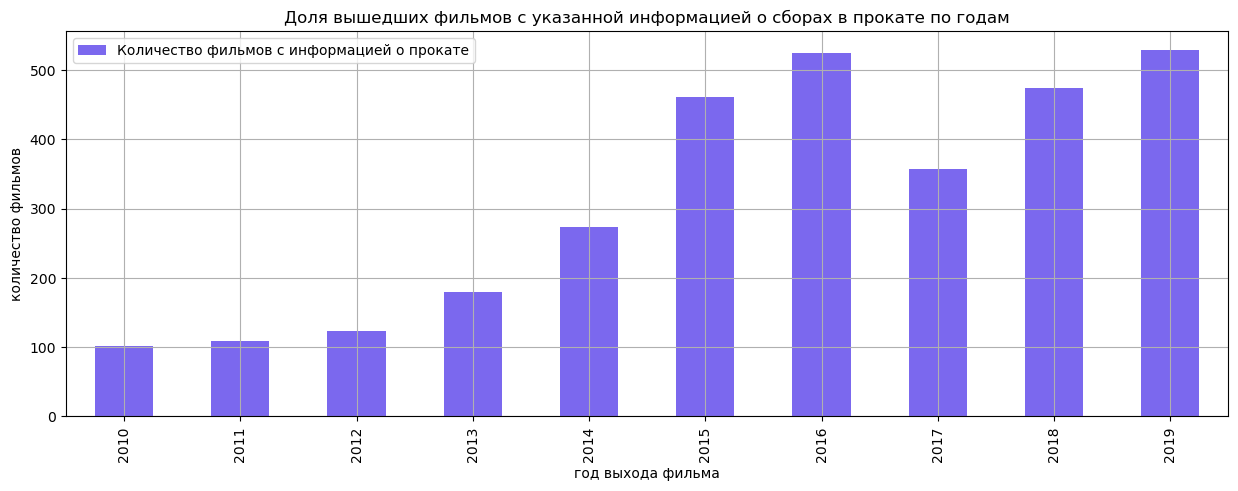

In [161]:
df_pivot_table.plot(y='Количество фильмов с информацией о прокате', kind='bar', figsize=(15,5), color='mediumslateblue');
plt.title('Доля вышедших фильмов с указанной информацией о сборах в прокате по годам')
plt.xlabel('год выхода фильма')
plt.ylabel('количество фильмов')
plt.grid(True)

На графике видна тенденция с 2010 года к увеличению количества фильмов, о которых имеется информация о сумме сборов в прокате. Возможно, это связано с тем, что с развитием технологий стало проще собирать и анализировать данные, а также ростом индустрии кино и соответственно увеличением количества выпускаемых фильмов. Отмечается спад в 2017 году, но в 2018 и 2019 годах снова видим рост. 
В количественном отношении наиболее полно представлен 2019 год: из 930 фильмов информация о сборах в прокате имеется о 530 фильмах. 
Относительно количества вышедших фильмов наиболее представлен 2017 год — из 505 вышедших фильмов имеются сведения о сборах в прокате о 357, что составляет 70 %. 

- Посмотрим, как менялась динамика проката по годам, в каком году сумма сборов была минимальной и максимальной

In [162]:
display('Сумма сборов в прокате по годам, млн. руб.', df_pivot_table[['Сумма сборов', 'Среднее', 'Медиана']] / 1000000)

'Сумма сборов в прокате по годам, млн. руб.'

,Сумма сборов,Среднее,Медиана
year_of_issue,,,
2010,2.43,0.02,0.00
2011,14.10,0.13,0.00
2012,6.96,0.06,0.01
2013,29.80,0.17,0.00
2014,7444.95,27.27,0.02
2015,39497.37,85.49,5.00
2016,47866.30,91.17,3.92
2017,48563.71,136.03,9.97
2018,49668.40,104.57,8.89


In [163]:
display(f"Минимальная сумма сборов {df_pivot_table['Сумма сборов'].min()} \
была в {df_pivot_table['Сумма сборов'].idxmin()} году")
display(f"Максимальная сумма сборов {df_pivot_table['Сумма сборов'].max()} \
была в {df_pivot_table['Сумма сборов'].idxmax()} году")

'Минимальная сумма сборов 2428654.0 была в 2010 году'

'Максимальная сумма сборов 49668403134.32 была в 2018 году'

Посмотрим на графике, как изменялась сумма сборов по годам:

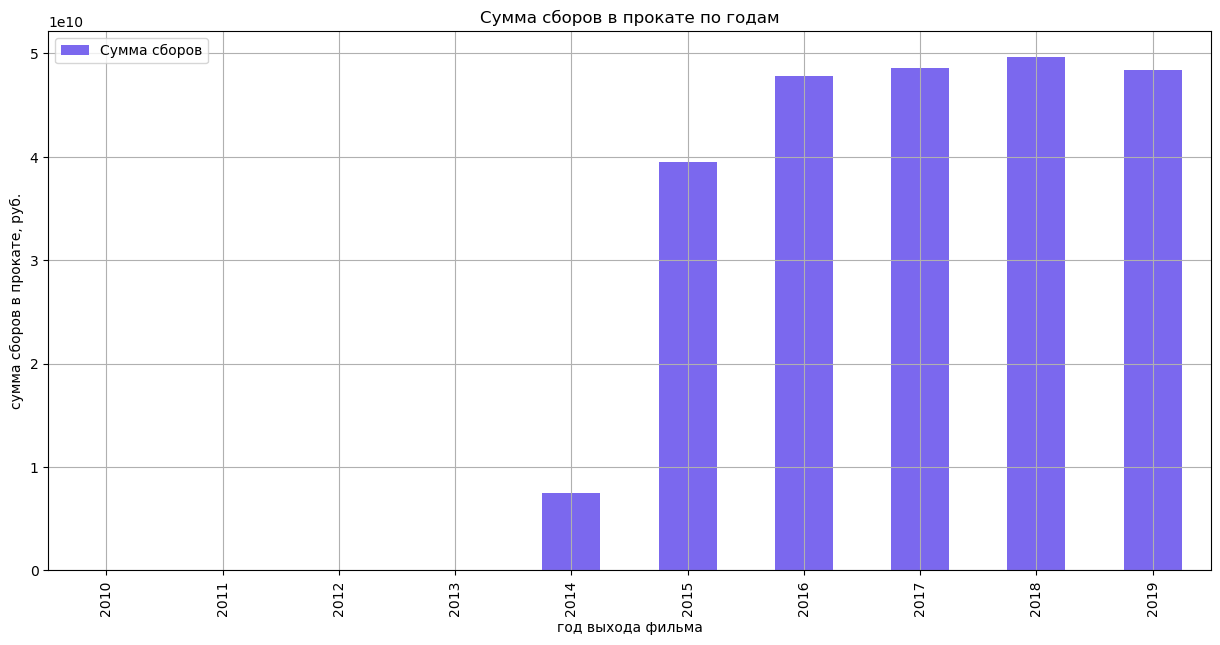

In [164]:
df_pivot_table.plot(y='Сумма сборов', kind='bar', figsize=(15,7), color='mediumslateblue', grid=True)
plt.title('Сумма сборов в прокате по годам')
plt.xlabel('год выхода фильма')
plt.ylabel('сумма сборов в прокате, руб.');

В 2010-2013 годах суммы сбора были такие незначительные, что их не видно на графике. Это не обязательно было так, возможно, просто в эти годы информация не собиралась и не накапливалась. С 2014 года наблюдается значительный рост и с 2016 года стабильно держатся высокие показатели. 

Посмотрим на графике среднее и медианное значение сборов в прокате по годам:

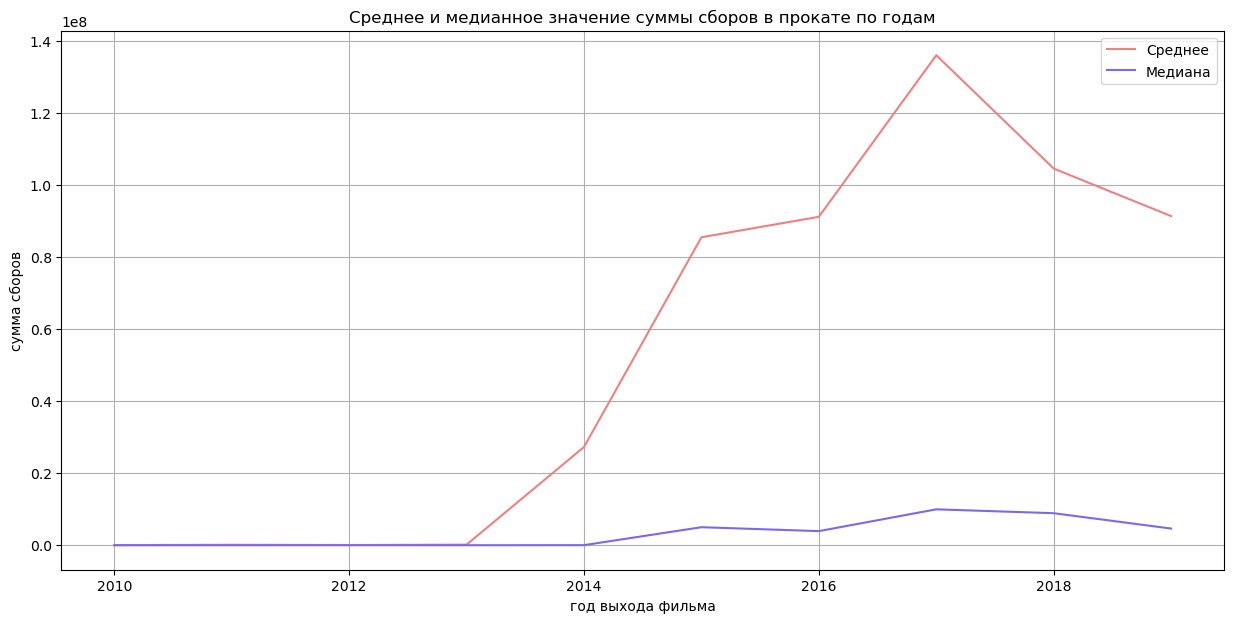

In [165]:
df_pivot_table.plot(y=['Среднее', 'Медиана'], kind='line', figsize=(15,7), color=['lightcoral', 'mediumslateblue'], \
                    grid=True)
plt.title('Среднее и медианное значение суммы сборов в прокате по годам')
plt.xlabel('год выхода фильма')
plt.ylabel('сумма сборов');

Как и на предыдущем графике, сборов за 2010-2013 годы здесь не видно. Тенденция на рост сохраняется, начиная с 2014 по 2019 суммы сборов увеличивались. Несмотря на изменение среднего за эти годы, медианное значение сохраняется примерно на одном уровне, что говорит о наличии выбивающихся значений в столбце.

- Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

In [166]:
df_age_restriction = df.query('year_of_issue >= 2015 and box_office > 0')
df_age_restriction = df_age_restriction.pivot_table(index='year_of_issue', 
                                                    columns='age_restriction', 
                                                    values='box_office', 
                                                    aggfunc='sum')
df_age_restriction

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_of_issue,,,,,
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41
2019,17746066.82,12680198773.67,12753418984.60,10121796303.64,12852548650.86


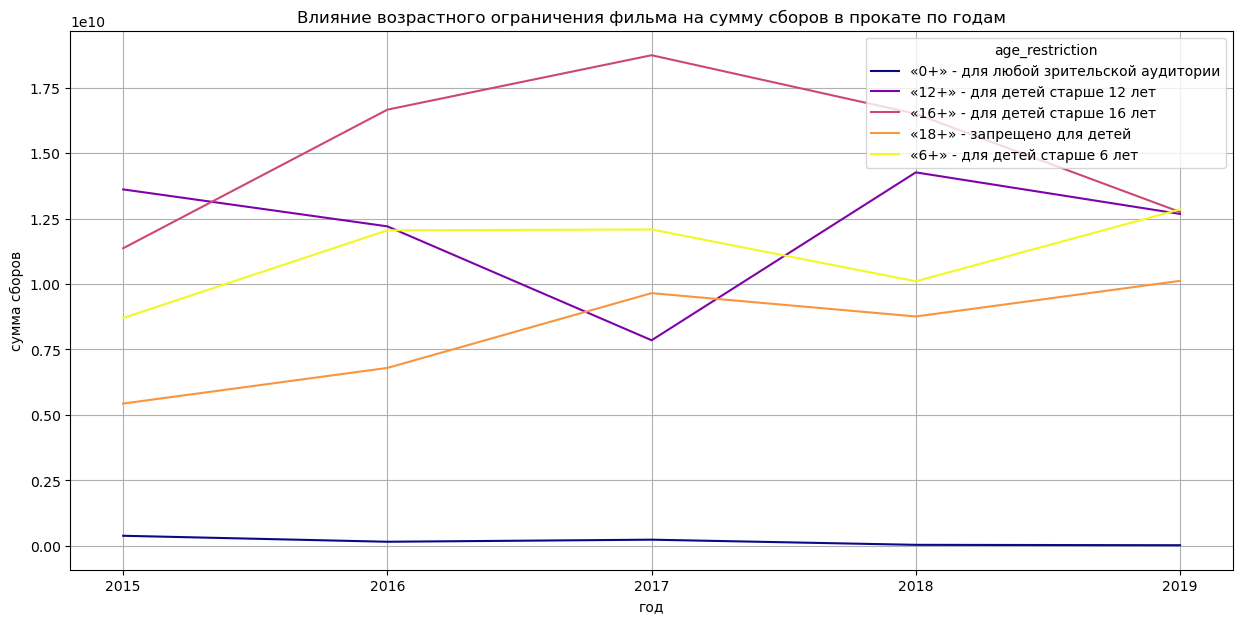

In [167]:
df_age_restriction.plot(kind='line', figsize=(15, 7), legend=True, colormap='plasma', grid=True)
plt.xticks(np.arange(2015,2020, step=1))
plt.title('Влияние возрастного ограничения фильма на сумму сборов в прокате по годам')
plt.xlabel('год')
plt.ylabel('сумма сборов');

Возрастное ограничение, по-видимому, влияет на сборы фильма в прокате. Фильмы с возрастным ограничением «12+» и «16+» в целом собирают больше всего денег в прокате. В период с 2015 по 2019 год фильмы с возрастным ограничением «12+» и «16+» собрали больше всего денег в прокате.
Картина меняется в зависимости от года. Например, в 2015 году фильмы с возрастным ограничением «12+» собрали больше всего денег, в то время как в 2017 году наибольшие сборы показали фильмы с возрастным ограничением «16+».
Эти изменения могут быть связаны с различными факторами, такими как изменение предпочтений аудитории, рост популярности определенных жанров или актеров, а также общие тенденции в индустрии кино. Кроме того, возможно, фильмы с возрастным ограничением «12+» и «16+» могут привлекать более широкую аудиторию, что приводит к большим сборам в прокате.

### Вывод

На этапе исследовательского анализа данных изучены вопросы:

1. сколько фильмов выходило в прокат каждый год; какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах; как эта доля менялась по годам, какой период полнее всего представлен в данных.
Имеется тенденция с 2010 года к увеличению количества фильмов, о которых имеется информация о сумме сборов в прокате. Возможно, это связано с тем, что с развитием технологий стало проще собирать и анализировать данные, а также ростом индустрии кино и соответственно увеличением количества выпускаемых фильмов. Отмечается спад в 2017 году, но в 2018 и 2019 годах снова количество увеличивается. 
В количественном отношении наиболее полно представлен 2019 год: из 930 фильмов информация о сборах в прокате имеется о 530 фильмах. 
Относительно количества вышедших фильмов наиболее представлен 2017 год — из 505 вышедших фильмов имеются сведения о сборах в прокате о 357, что составляет 70 %. 

2. как менялась динамика проката по годам: в каком году сумма сборов была минимальной и максимальной. 
Посчитали среднюю и медианную сумму сборов для каждого года, сравним значения и сделаем выводы.
Минимальная сумма сборов 2.5 млн.руб. была в 2010 году. В 2010-2013 годах суммы сбора были такие незначительные, что их не видно на графике. Начиная с 2014 года, сумма сборов значительно увеличилась и стабилизировалась на высоком уровне с 2016 года. Это может быть связано с ростом популярности кино как формы развлечения или увеличением числа кинотеатров.
Несмотря на общий рост средних сборов, медианное значение остается примерно на одном уровне. Это указывает на наличие выбросов в данных — фильмов с очень высокими сборами, которые влияют на среднее значение, но не на медиану. Это может быть связано с наличием блокбастеров с очень высокими сборами.
Низкие сборы в 2010-2013 годах могут быть связаны не только с меньшим количеством фильмов или меньшей популярностью кино, но и с отсутствием данных. В эти годы информация о сборах не собиралась так активно, как сейчас.
Максимальная сумма сборов 50 млрд.руб. была в 2018 году. Минимальные сборы в 2010 году и максимальные сборы в 2018 году могут быть связаны с различными факторами, включая экономическую ситуацию, популярность определенных жанров или фильмов в эти годы.

3. влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год, фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Как меняется картина в зависимости от года и с чем это может быть связано. 
Возрастное ограничение, по-видимому, влияет на сборы фильма в прокате. Фильмы с возрастным ограничением «12+» и «16+» в целом собирают больше всего денег в прокате. В период с 2015 по 2019 год фильмы с возрастным ограничением «12+» и «16+» собрали больше всего денег в прокате. Картина меняется в зависимости от года. Например, в 2015 году фильмы с возрастным ограничением «12+» собрали больше всего денег, в то время как в 2017 году наибольшие сборы показали фильмы с возрастным ограничением «16+». Эти изменения могут быть связаны с различными факторами, такими как изменение предпочтений аудитории, рост популярности определенных жанров или актеров, а также общие тенденции в индустрии кино. Кроме того, возможно, фильмы с возрастным ограничением «12+» и «16+» могут привлекать более широкую аудиторию, что приводит к большим сборам в прокате.


## Исследование фильмов, которые получили государственную поддержку

На этом этапе посмотрим, сколько выделяют средств на поддержку кино, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Выделим фильмы, созданные при поддежке государства, в отдельный датафрейм. 

In [168]:
supported_movies = df.query('budget > 0')
information_data(supported_movies)

'Первые десять строк датафрейма:'

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_part,year_of_issue,main_director,main_genres
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,0.33,2013,А.Атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,0.00,Нет данных,28140.00,0.70,2014,А.Якимчук,Нет данных
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,0.61,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,0.62,2014,М.Угаров,драма
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,0.48,2015,С.Серегин,мультфильм
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,Нет данных,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,0.68,2015,Р.Давлетьяров,драма
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,46502299.00,86210067.00,"Министерство культуры, Фонд кино",6.70,драма,4731239.50,0.54,2014,В.Глаголева,драма
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,0.54,2015,А.Войтинский,триллер
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,0.70,2015,Д.Федоров,фэнтези


'Общая информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 1281 to 7477
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64            


None

'Описание данных:'

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,support_part,year_of_issue
count,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00
mean,111593819.10,11864457.83,48980988.89,134308781.48,5.73,126847920.41,0.49,2016.72
std,5703031.32,24916555.26,59980117.92,187794697.27,1.71,328762573.57,0.20,1.64
min,111000115.00,0.00,0.00,10130608.05,0.00,0.00,0.00,2013.00
25%,111004891.50,0.00,25000000.00,46153971.75,5.20,909431.25,0.35,2015.00
50%,111010367.00,0.00,30000000.00,74955000.00,6.10,12144193.50,0.56,2017.00
75%,111017815.75,15000000.00,40375000.00,150002143.25,6.70,103107405.69,0.65,2018.00
max,214010116.00,180000000.00,400000000.00,2305074303.00,9.40,3073568690.79,0.78,2019.00


'Количество пропусков:'

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
support_part             0
year_of_issue            0
main_director            0
main_genres              0
dtype: int64

'Количество дубликатов:'

0

Посмотрим, какую долю данных составляют фильмы, получившие государственное финансирование: 

In [169]:
print('Доля фильмов с гос.финансированием составляет', round(df.query('budget > 0')
                                                                  ['pu_number'].count() / df['budget'].count() * 100, 2), '%', end='')

Доля фильмов с гос.финансированием составляет 4.44 %

Посмотрим на графике среднее распределение по годам возвратных, невозвратных средств государственной поддержки и собственных средств киностудии.

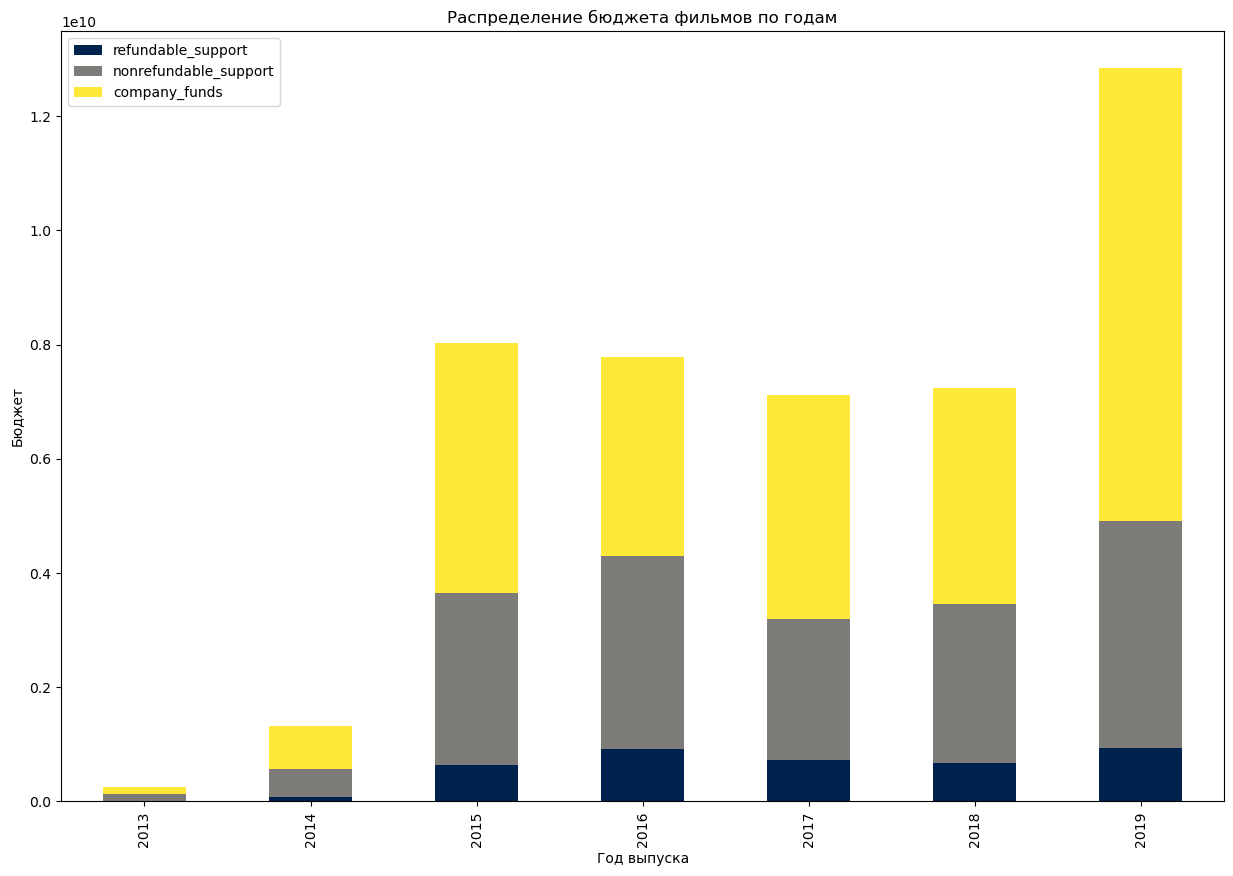

In [187]:
supported_movies_selected = supported_movies[['year_of_issue', 'refundable_support', 'nonrefundable_support', 'budget']]

# добавляем столбец с собственными средствами компании
supported_movies_selected = supported_movies_selected.assign(company_funds = lambda x: x.budget - x.refundable_support - x.nonrefundable_support)

# добавляем столбец с размером государственной поддержки
supported_movies_selected = supported_movies_selected.assign(support_size = lambda x: x.refundable_support + x.nonrefundable_support)

grouped = supported_movies_selected.groupby('year_of_issue').sum() # Группируем данные по году выпуска
grouped[['refundable_support', 'nonrefundable_support', 'company_funds']].plot(kind='bar', 
                                                                               stacked=True, 
                                                                               colormap='cividis', 
                                                                               figsize=(15,10));

plt.xlabel('Год выпуска')
plt.ylabel('Бюджет')
plt.title('Распределение бюджета фильмов по годам')
plt.show()

На графике видим, что в 2014-2018 суммарный объем государственной поддержки составляет примерно половину общего бюджета фильма. В 2019 году значительно увеличивается общий бюджет фильмов, объем гос.поддержки так же возрос по сравнению с прошлыми годами, но в 2019 году составляет чуть больше трети от общего бюджета. 
Также отмечаем общую тенденцию на увеличение бюджета фильмов. 

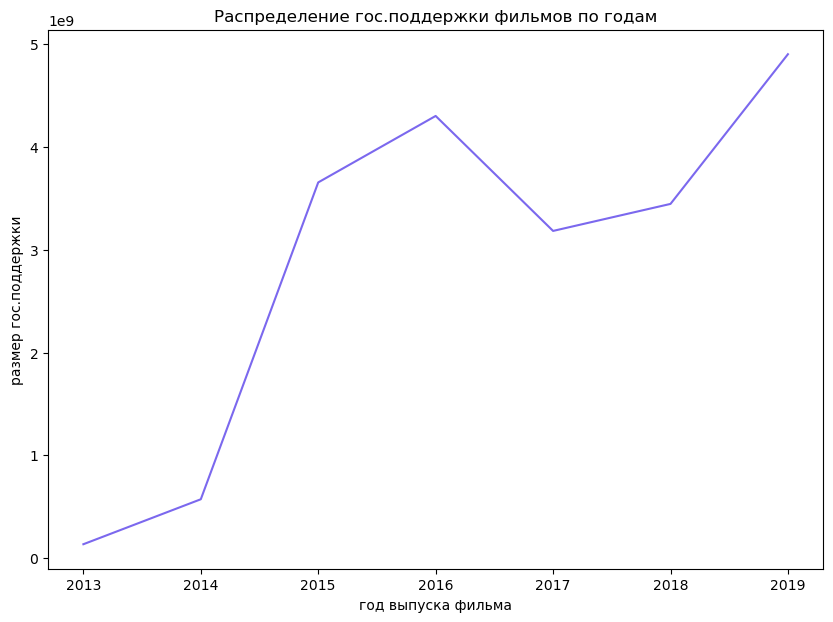

In [189]:
grouped['support_size'].plot(kind='line', figsize=(10,7), color='mediumslateblue');
plt.xlabel('год выпуска фильма')
plt.ylabel('размер гос.поддержки')
plt.title('Распределение гос.поддержки фильмов по годам')
plt.show()

С 2013 года размер государственной поддержки фильмов, за исключением небольшого спада в 2017-2018 годах, постоянно растет. 

Посмотрим, какие кинокомпании получили наибольшую сумму государственной поддержки

In [172]:
# Вычисляем общую сумму государственной поддержки
supported_movies = supported_movies.assign(total_support = df['refundable_support'] + df['nonrefundable_support'])

# Группируем данные по кинокомпаниям и суммируем общую поддержку
grouped = supported_movies.groupby('film_studio')['total_support'].sum()

# Сортируем данные по убыванию и выводим первые 10 кинокомпаний
grouped.sort_values(ascending=False).head(10)


film_studio
ООО "Нон-Стоп Продакшн"                        940000000.00
ООО "Студия "ТРИТЭ" Никиты Михалкова"          842104482.00
ООО "ТаББаК"                                   744000000.00
ООО "Студия анимационного кино "Мельница"      630000000.00
ООО "ВИЗАРТ ФИЛЬМ"                             540000000.00
ООО "Арт Пикчерс Студия", ООО "Водород 2011"   500000000.00
ЗАО "Дирекция кино"                            500000000.00
ООО "Продюсерская фирма Игоря Толстунова"      355000000.00
ООО "Продюсерский центр ИВАН"                  350000000.00
ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                      330000000.00
Name: total_support, dtype: float64

In [173]:
df.groupby('main_director')['budget'].sum().to_frame('budget').sort_values(by= 'budget', ascending = False).head()

,budget
main_director,
О.Степченко,2305074303.00
Ф.Бондарчук,1366108668.84
А.Учитель,1032905957.00
Н.Хомерики,985010746.52
А.Кравчук,980000000.00


Посмотрим на графике:

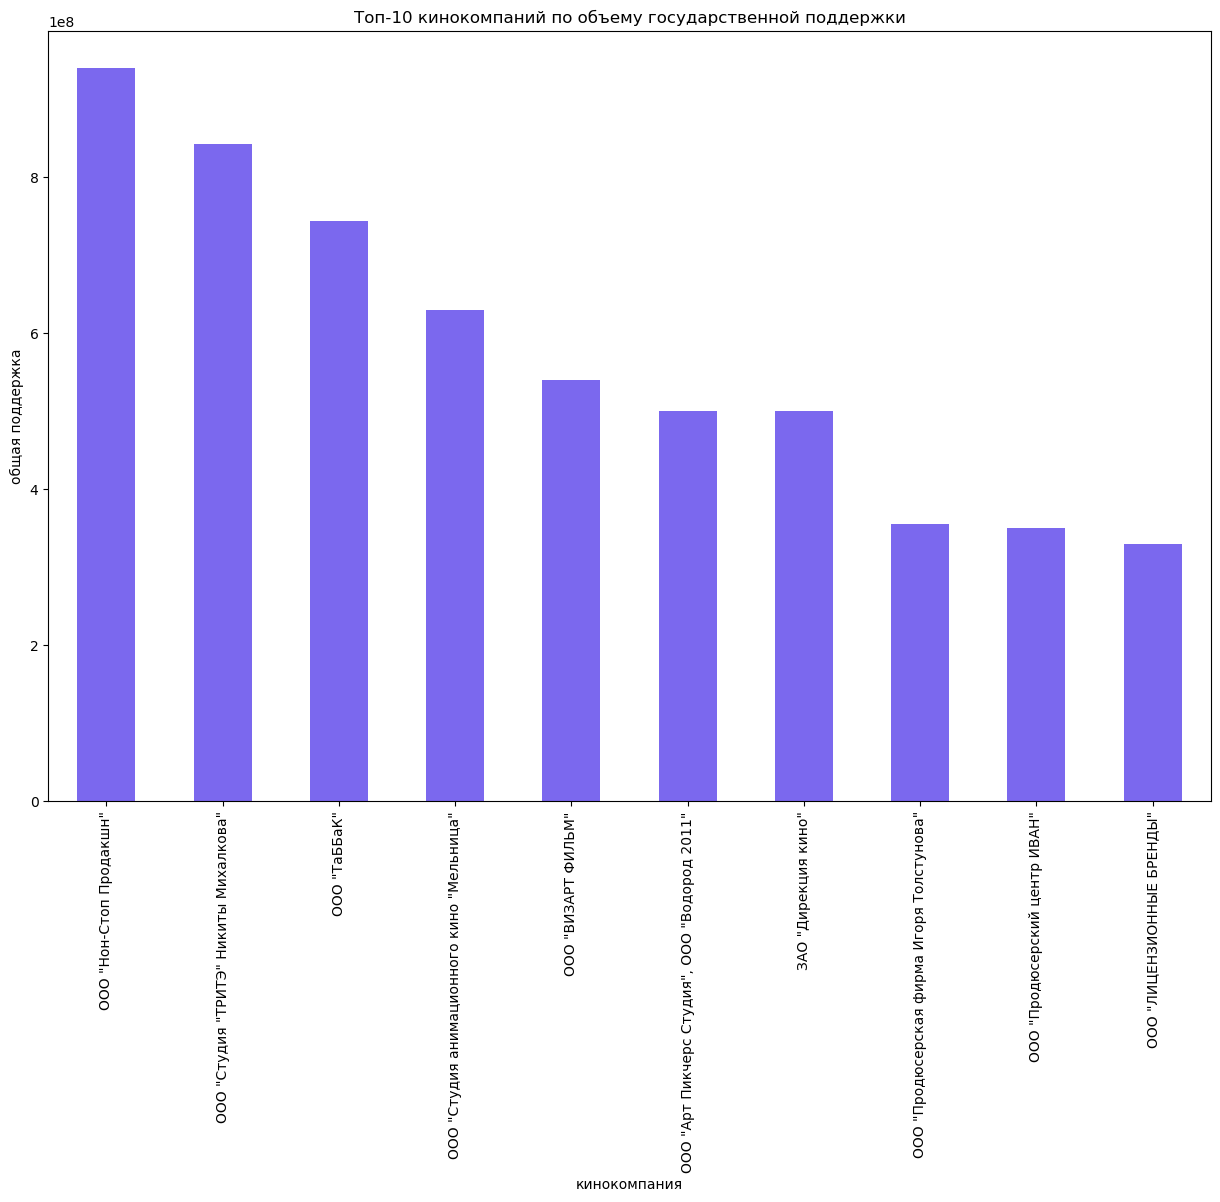

In [174]:
grouped.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15,10), color='mediumslateblue');
plt.xlabel('кинокомпания')
plt.ylabel('общая поддержка')
plt.title('Топ-10 кинокомпаний по объему государственной поддержки')
plt.xticks(rotation='vertical')  # Поворачиваем подписи оси x на 90 градусов
plt.show()

Киностудии ООО "Нон-Стоп Продакшн", ООО "Студия "ТРИТЭ" Никиты Михалкова", ООО "ТаББаК", ООО "Студия анимационного кино "Мельница", ООО "ВИЗАРТ ФИЛЬМ" за изучаемый период получили наибольшую поддержку на создание фильмов. 

Посмотрим, создание фильмов совместно с какими странами, наиболее поддерживается государством

In [175]:
grouped = supported_movies.groupby('production_country')['total_support'].sum()
grouped.sort_values(ascending=False).head(10)

production_country
Россия                             19375676013.00
Россия-Китай                         270000000.00
Россия, Италия                       120000000.00
Россия, Германия                      63000000.00
Россия, Армения                       50000000.00
Россия, Германия, Великобритания      50000000.00
Россия, Франция, Латвия               46502299.00
Россия, Сербия                        35000000.00
Россия, Бельгия, Финляндия            30000000.00
Россия, Украина, Польша               30000000.00
Name: total_support, dtype: float64

Тройка лидеров: Китай, Италия, Германия. На совместное с этими странами создание фильмов выделяется больше всего денег. 

**Как распределяется государственная поддержка на создание фильмов для различных возрастных категорий**

In [176]:
grouped = supported_movies.groupby('age_restriction')['total_support'].sum()
grouped.sort_values(ascending=False).head(10)


age_restriction
«12+» - для детей старше 12 лет          7799394165.00
«16+» - для детей старше 16 лет          5569053319.00
«6+» - для детей старше 6 лет            5546373947.00
«18+» - запрещено для детей              1012346881.00
«0+» - для любой зрительской аудитории    273520000.00
Name: total_support, dtype: float64

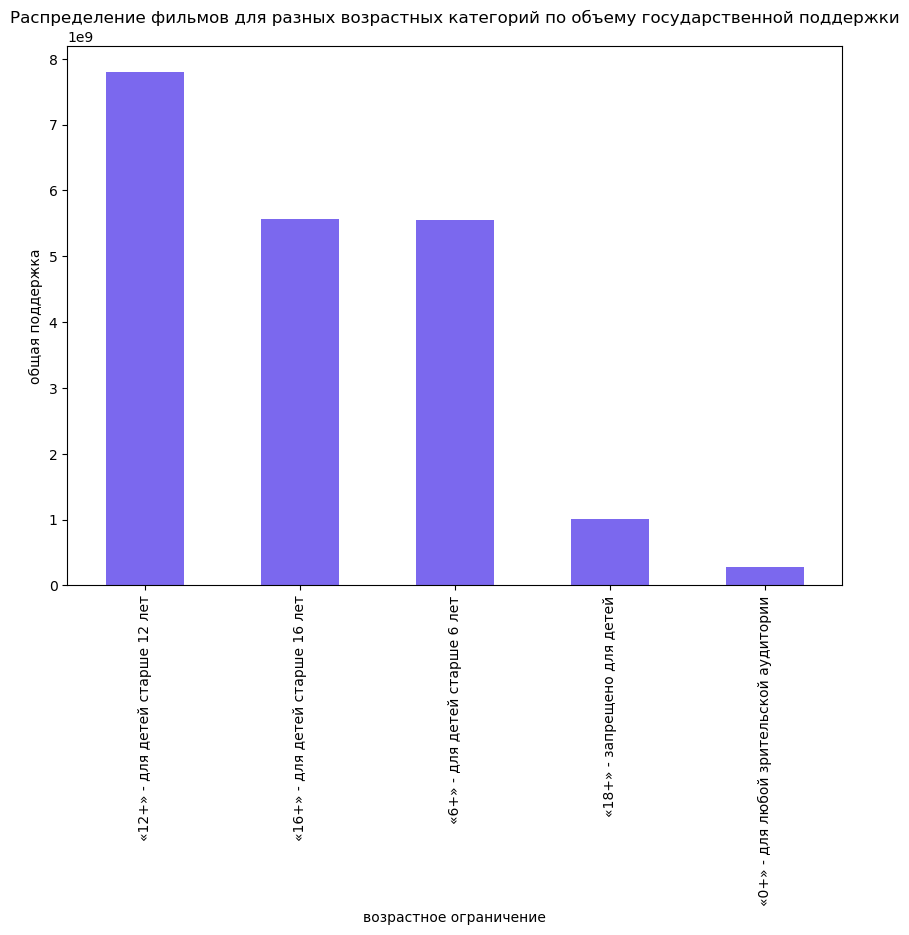

In [177]:
grouped.sort_values(ascending=False).plot(kind='bar', figsize=(10,7), color='mediumslateblue');
plt.xlabel('возрастное ограничение')
plt.ylabel('общая поддержка')
plt.title('Распределение фильмов для разных возрастных категорий по объему государственной поддержки')
plt.xticks(rotation='vertical')  # Поворачиваем подписи оси x на 90 градусов
plt.show()

Фильмы с возрастным ограничением «12+» за представленный период получили наибольшую поддержку, составляющую 7800 млн. рублей.
Фильмы категории «16+» получили поддержку в размере 5569 млн. рублей.
Фильмы категории «6+» получили поддержку в размере 5546 млн. рублей.
Фильмы с возрастным ограничением «18+» получают значительно меньше поддержки, составляющую 1012 млн. рублей.
Фильмы категории «0+» (для любой зрительской аудитории) получают наименьшую поддержку, составляющую 273 млн. рублей.
Это показывает, что государственное финансирование в большей степени направлено на создание фильмов для подростков и молодежи (12+ и 16+), в то время как фильмы для взрослых (18+) и для всех возрастов (0+) получают меньше поддержки. 

**Посмотрим взаимосвязь общего размера гос. поддержки фильма, части гос.поддержки от общего бюджета и рейтинга фильма на матрице диаграмм рассеяния.**

In [178]:
supported_movies[['total_support', 'support_part', 'ratings']].corr()

,total_support,support_part,ratings
total_support,1.00,0.03,0.11
support_part,0.03,1.00,-0.08
ratings,0.11,-0.08,1.00


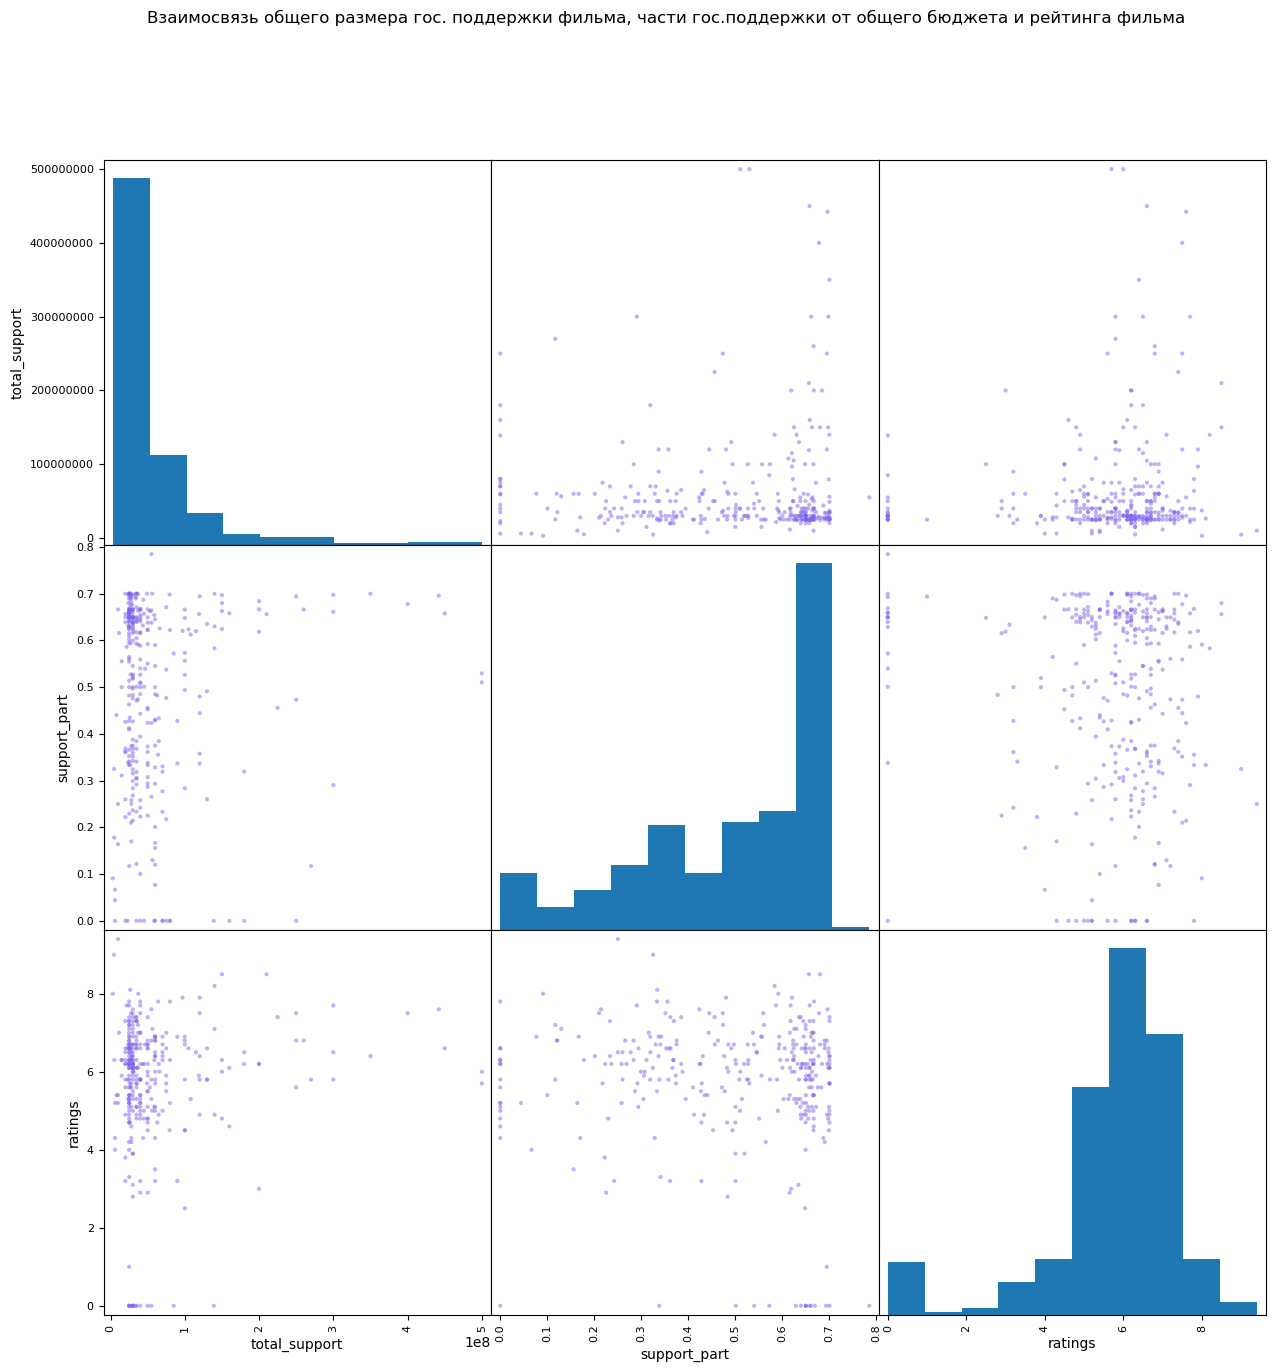

In [179]:
pd.plotting.scatter_matrix(supported_movies[['total_support', 'support_part', 'ratings']], 
                           figsize=(15,15), 
                           color='mediumslateblue')
plt.suptitle('Взаимосвязь общего размера гос. поддержки фильма, \
части гос.поддержки от общего бюджета и рейтинга фильма');
plt.show()

Сумма государственной поддержки `total_support` и часть государственной поддержки от общего бюджета фильма `support_part`: коэффициент корреляции составляет 0.03, что говорит об отсутствии связи между этими переменными. Это означает, что изменение одной переменной не влечет за собой пропорционального изменения другой.

Сумма государственной поддержки `total_support` и рейтинг фильма `ratings`: коэффициент корреляции составляет 0.11, что также указывает отсутствие связи. Это говорит о том, что увеличение суммы государственной поддержки не гарантирует повышения рейтинга фильма.

Часть государственной поддержки от общего бюджета фильма `support_part` и рейтинг фильма `ratings`: коэффициент корреляции составляет -0.08, что указывает на отсутствие взаимосвязи. Это означает, что увеличение доли государственной поддержки от общего бюджета фильма не ведет к изменению рейтинга фильма.

Важно помнить, что корреляция не означает причинно-следственной связи. Даже если бы мы обнаружили сильную корреляцию, это не гарантировало бы, что изменение одной переменной вызывает изменение другой. Для определения причинно-следственных связей требуется более глубокий анализ данных. 

**На создание фильмов какого типа и жанра выделяется больше всего средств**

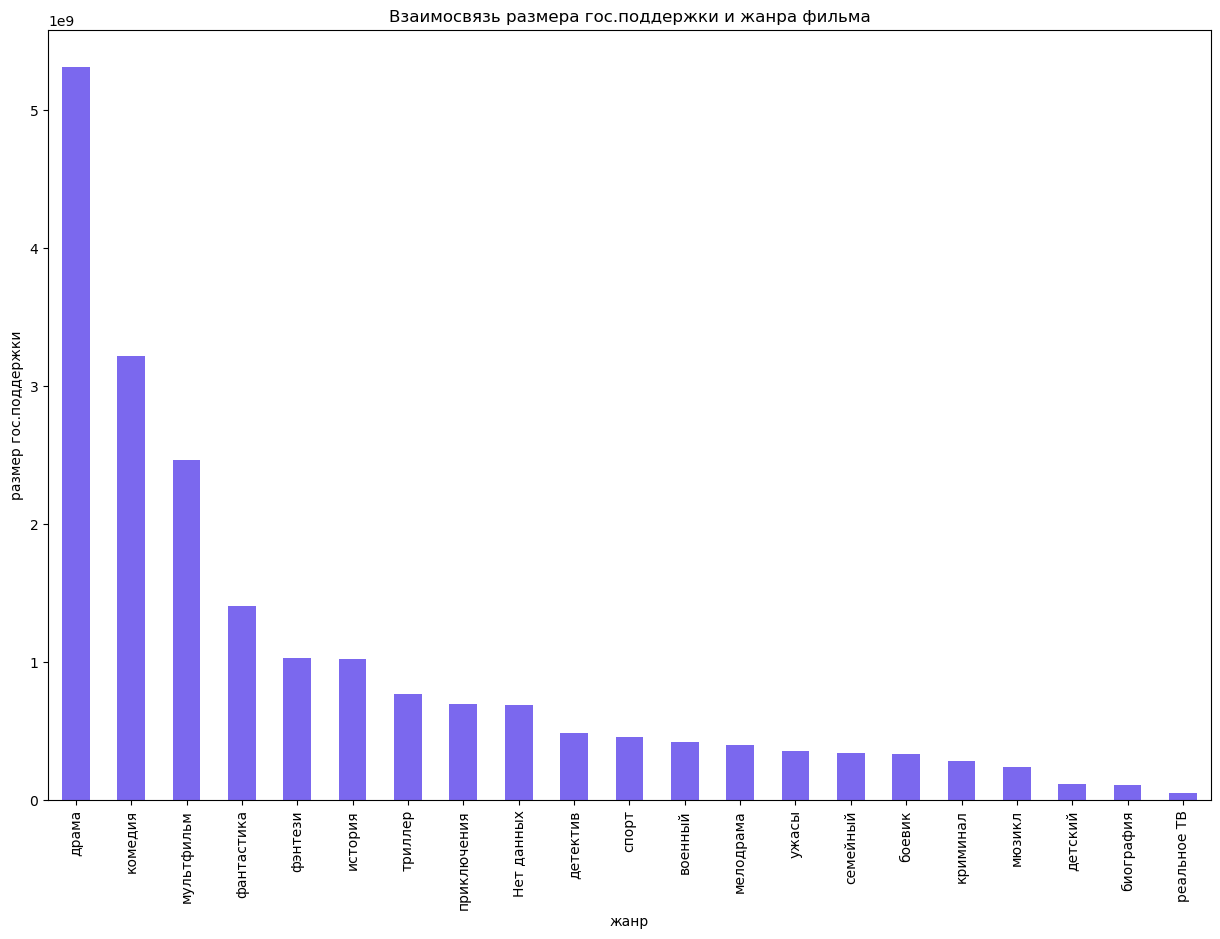

In [180]:
supported_movies.groupby('main_genres')['total_support'].sum().\
sort_values(ascending=False).plot(kind='bar', figsize=(15,10), color='mediumslateblue');
plt.xlabel('жанр')
plt.ylabel('размер гос.поддержки')
plt.title('Взаимосвязь размера гос.поддержки и жанра фильма')
plt.xticks(rotation='vertical')
plt.show()

In [181]:
supported_movies.groupby('type')['total_support'].sum().sort_values(ascending=False)

type
Художественный   17627198847.00
Анимационный      2570489465.00
Документальный       3000000.00
Name: total_support, dtype: float64

Больше всего средств выделяется на создание фильмов в жанрах "драма", "комедия", "мультфильмы". 
По типам фильма государственное финансирование распределяется следующим образом: больше всего средств выделяется на создание художественных фильмов, на втором месте — анимационные, меньше всех получили гос. поддержки документальные фильмы.

**Сравним общий размер государственной поддержки фильмов и сумму сборов в прокате в кинотеатрах**

In [182]:
supported_movies[['total_support', 'box_office']].corr()

,total_support,box_office
total_support,1.00,0.46
box_office,0.46,1.00


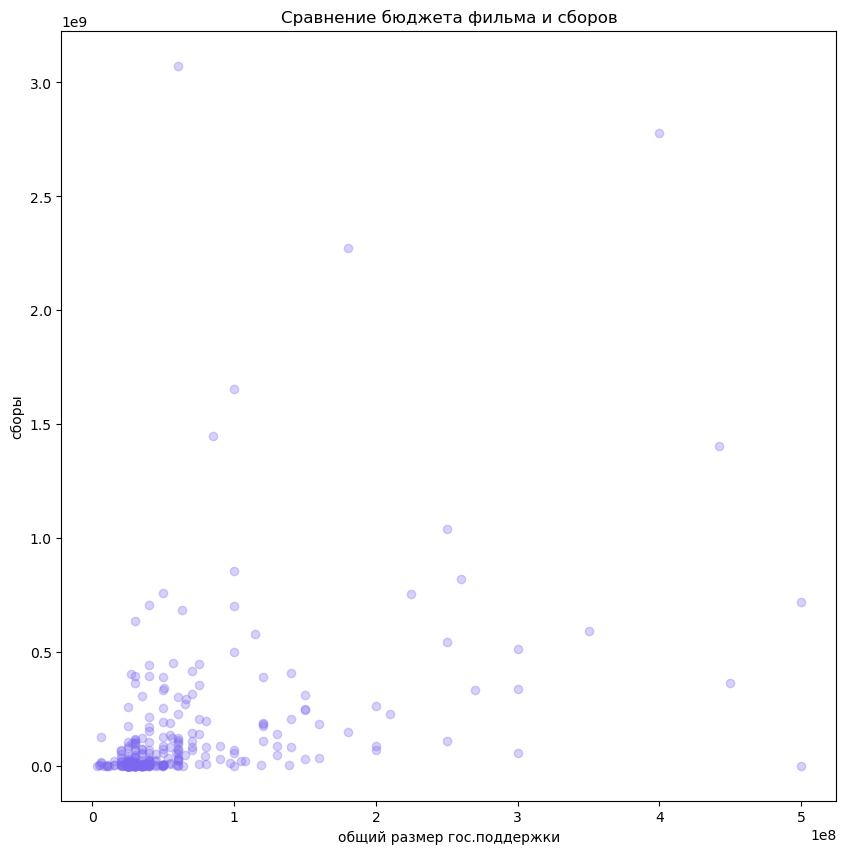

In [183]:
plt.figure(figsize=(10,10))
plt.scatter(supported_movies['total_support'], supported_movies['box_office'], alpha=0.3, color='mediumslateblue')
plt.xlabel('общий размер гос.поддержки')
plt.ylabel('сборы')
plt.title('Сравнение бюджета фильма и сборов')
plt.show()

Коэффициент корреляции между total_support и box_office равен 0.46, что указывает на слабо выраженную положительную корреляцию. Это означает, что с увеличением общего размера государственной поддержки фильмов, сумма сборов в прокате в кинотеатрах также, в целом, увеличивается.
Однако стоит отметить, что корреляция не означает прямую причинно-следственную связь. Другими словами, хотя данные показывают связь между государственной поддержкой и сборами в прокате, это не обязательно означает, что увеличение государственной поддержки приведет к увеличению сборов в прокате. Возможно, есть и другие факторы, которые влияют на сборы в прокате.

В завершение посмотрим, какой фильм получил наибольшую и какой наименьшую сумму гос.поддержки.

In [184]:
display(supported_movies.loc[supported_movies['total_support'].idxmax()])
display(supported_movies.loc[supported_movies['total_support'].idxmin()])

title                                      Союз спасения
pu_number                                      111022019
show_start_date                2019-12-26 12:00:00+00:00
type                                      Художественный
film_studio                          ЗАО "Дирекция кино"
production_country                                Россия
director                                       А.Кравчук
producer                             А.Максимов, К.Эрнст
age_restriction          «12+» - для детей старше 12 лет
refundable_support                          100000000.00
nonrefundable_support                       400000000.00
budget                                      980000000.00
financing_source                               Фонд кино
ratings                                             6.00
genres                           история,биография,драма
box_office                                  717703185.53
support_part                                        0.51
year_of_issue                  

title                                    Байкал - Сердце мира 3D
pu_number                                              112004619
show_start_date                        2019-11-01 12:00:00+00:00
type                                              Документальный
film_studio                ООО "Продюсерский центр "Новое Время"
production_country                                        Россия
director                                                А.Попова
producer                 И.Добровольский, А.Разуваева, Ю.Перкуль
age_restriction           «0+» - для любой зрительской аудитории
refundable_support                                          0.00
nonrefundable_support                                 3000000.00
budget                                               33000000.00
financing_source                           Министерство культуры
ratings                                                     8.00
genres                                                  семейный
box_office               

За рассматриваемый период наибольшую и наименьшую поддержку получили фильмы:

- Союз спасения 2019 года с долей гос. финансирования 51 %, составляющей суммарно 500 млн. руб. и рейтингом 6.0, 

- Байкал - Сердце мира 3D 2019 года с долей гос. финансирования 9 % в сумме 3 млн. руб. и рейтингом 8.0. 

### Вывод

Фильмы, созданные при поддежке государства, для проведения исследования выделены в отдельный датафрейм. Датафрейм имеет 332 строки. Доля фильмов с гос.финансированием составляет 4.44 % от представленных данных.
С 2010 года отмечаем тенденцию на увеличение бюджета фильмов. В 2014-2018 суммарный объем государственной поддержки составляет примерно половину общего бюджета фильма. В 2019 году значительно увеличивается общий бюджет фильмов, объем гос.поддержки так же возрос. 
С 2013 года размер государственной поддержки фильмов, за исключением небольшого спада в 2017-2018 годах, постоянно растет.
Киностудии ООО "Нон-Стоп Продакшн", ООО "Студия "ТРИТЭ" Никиты Михалкова", ООО "ТаББаК", ООО "Студия анимационного кино "Мельница", ООО "ВИЗАРТ ФИЛЬМ" за изучаемый период получили наибольшую поддержку на создание фильмов.

На совместное создание фильмов с Китаем, Италием, Германией выделяется больше всего денег.

Фильмы с возрастным ограничением «12+» за представленный период получили наибольшую поддержку, составляющую 7800 млн. рублей.
Фильмы категории «16+» получили поддержку в размере 5569 млн. рублей.
Фильмы категории «6+» получили поддержку в размере 5546 млн. рублей.
Фильмы с возрастным ограничением «18+» получают значительно меньше поддержки в размере 1012 млн. рублей.
Фильмы категории «0+» (для любой зрительской аудитории) получают наименьшую поддержку, составляющую 273 млн. рублей.
Это показывает, что государственное финансирование в большей степени направлено на создание фильмов для подростков (12+ и 16+), в то время как фильмы для взрослых (18+) и для всех возрастов (0+) получают меньше поддержки. 

<code>total_support</code> (сумма государственной поддержки на создание фильма) имеет:

- слабую положительную корреляцию с <code>support_part</code> (часть государственной поддержки от общего бюджета фильма) со значением 0.03. Это означает, что при увеличении суммы государственной поддержки, часть государственной поддержки от общего бюджета фильма также незначительно увеличивается.
- слабую положительную корреляцию с <code>ratings</code> (рейтинг фильма) со значением 0.11. Это означает, что при увеличении суммы государственной поддержки, рейтинг фильма также незначительно увеличивается.

Больше всего средств выделяется на создание фильмов в жанрах "драма", "комедия", "мультфильмы". 
По типам фильма государственное финансирование распределяется следующим образом: больше всего средств выделяется на создание художественных фильмов, на втором месте — анимационные, меньше всех получили гос. поддержки документальные фильмы.

<code>support_part</code> (часть государственной поддержки от общего бюджета фильма) имеет:
- слабую отрицательную корреляцию с <code>ratings</code> (рейтинг фильма) со значением -0.08. Это означает, что при увеличении доли государственной поддержки от общего бюджета фильма, рейтинг фильма незначительно снижается.

Коэффициент корреляции между <code>total_support</code>(общий размер государственной поддержки) и <code>box_office</code>(сборы в прокате) равен 0.46, что указывает на умеренную положительную корреляцию. Это означает, что с увеличением общего размера государственной поддержки фильмов, сумма сборов в прокате в кинотеатрах также, в целом, увеличивается.
Однако стоит отметить, что корреляция не означает прямую причинно-следственную связь. Другими словами, хотя данные показывают связь между государственной поддержкой и сборами в прокате, это не обязательно означает, что увеличение государственной поддержки приведет к увеличению сборов в прокате. Возможно, есть и другие факторы, которые влияют на сборы в прокате.

За рассматриваемый период наибольшую и наименьшую поддержку получили фильмы:
Союз спасения 2019 года с долей гос. финансирования 51 %, составляющей суммарно 500 млн. руб., и рейтингом 6.0, 
Байкал - Сердце мира 3D 2019 года с долей гос. финансирования 9 % в сумме 3 млн. руб. и рейтингом 8.0. 

## Общий вывод

**1. Описание данных.**

Для проведения анализа представлено 2 таблицы:

mkrf_movies с информацией из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Содержит 15 столбцов и 7486 строк;
mkrf_shows, содержащая сведения о показах фильмов в российских кинотеатрах. Содержит 2 столбца и 3158 строк.
Для объединения таблиц использовался столбец puNumber, содержащий информацию о номере прокатного удостоверения. Так как в датафреймах указанный столбец имел несовпадающий тип данных (в mkrf_movies — object, в mkrf_shows — int64), предварительно была проведена проверка на наличие нечисловых значений столбца в таблице mkrf_movies. Обнаруженные некорректные данные в двух строках были исправлены (одна строка содержала лишний пробел, вторая строка не содержала номера прокатного удостоверения и была удалена). После приведения столбца puNumber таблицы mkrf_movies к типу данных int64 был создан объединенный датафрейм df.
Объединенная таблица df имеет 16 столбцов и 7485 строк.

- title — название фильма;
- pu_number — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма (включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку);
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- box_office — сборы в рублях.

Имеются пропуски: 4 столбца — refundable_support, nonrefundable_support, financing_source — источник государственного финансирования, budget имеют 95 % пропусков. Пропуски в этих столбцах означают, что фильм был снят без государственной поддержки. 

Столбец box_office содержит 58 % пропусков. Он содержит сведения о показах фильмов в российских кинотеатрах (сборы в рублях). Пропуски могут означать, что фильм не выходил в кинотеатрах, либо отсутствие информации. 

Столбцы ratings и genres имеют 13 % и 12 % пропусков соответственно. 
В столбце producer 7,6 % пропусков. Возможно, это означает, что в этих фильмах режиссер одновременно был и продюсером, либо что данных нет. 
Еще несколько столбцов содержат менее 1 % пропусков: production_country, director, film_studio.

**2. На этапе предварительной обработки данных выполнены следующие шаги:**

изменены типы данных на корректные в столбцах:
- <code>show_start_date</code> к формату datetime64 для удобства дальнейшей работы;

- <code>ratings</code> к типу float64.

заполнены пропуски в датафрейме:

"Нет данных": 
- <code>film_studio</code>
- <code>production_country</code>
- <code>director</code>
- <code>producer</code>
- <code>genres</code>

"0":
- <code>refundable_support</code>
- <code>nonrefundable_support</code>
- <code>ratings</code>
- <code>budget</code>
- <code>box_office</code>

"Частное производство":
- <code>financing_source</code>

обработаны дубликаты в датафрейме:

Строк-дубликатов не обнаружено. Изучены по отдельности столбцы:

- <code>title</code>. В столбце имеется 558 повторяющихся наименований. Некоторые наименовая фильмов встречаются в таблице несколько раз, при этом имеют разные номера прокатного удостоверения и дату премьеры. Возможно, фильм запускался в прокат несколько раз, возможно, прокатное удостоверение выдавалось под разные цели, либо после внесения изменений в ленту (например, удаление некоторых сцен). Обнаружено 8 фильмов с совпадающей датой премьеры, но у всех различные номера прокатного удостоверения. Строки оставлены без изменений, возможно, как было указано выше, прокатное удостоверение выдавалось под разные цели. Фильмов с одинаковыми названиями и номерами прокатного удостоверения нет.
-  <code>pu_number</code>. Обнаружено два фильма с одинаковыми номерами прокатного удостоверения, оставили без изменений.

изучены категориальные значения: 

Столбцы <code>'film_studio'</code>, <code>'production_country'</code>, <code>'director'</code>, <code>'producer'</code>, <code>'genres'</code>, <code>'type'</code> были обработаны путем удаления невидимых символов. Более детальный разбор этих столбцов не проводился в связи с тем, что на анализ это не повлияет, а на дальнейшем этапе предобработки будут добавлены столбцы с главным режиссером и основным жанром. 

В столбцах, содержащих категориальные данные, часто встречается такая проблема как неодинаковый подход к записи данных. Например, информация о стране-производителе может быть записана с использованием разных разделителей, таких как дефис или запятая, а также могут присутствовать пробелы после страны. В столбце <code>type</code> обнаружены пробелы в начале значений. В названиях фильмов также замечены различия в орфографии: иногда используются знаки препинания. Таким образом, помимо проблем с пропущенными значениями, выявленными на ранних этапах анализа, существует и проблема с неоднородностью существующих данных: значения в одном и том же столбце могут иметь разные форматы записи.

проверены количественные значения:

Для 17 фильмов, созданных при поддержке государства, не указан размер бюджета, при этом столбцы <code>refundable_support</code> и <code>nonrefundable_support</code> заполнены. На основе медианного значения доли государственной поддержки фильмов рассчитан размер бюджета для фильмов, созданных с гос.поддержкой, заменены нули в данных на полученное значение. 
        
добавлены новые столбцы: 

с информацией о годе проката <code>year_of_issue</code>, с именем и фамилией главного режиссёра <code>main_director</code> и основным жанром фильма <code>main_genres</code>, долей государственной поддержки от общего бюджета фильма <code>support_part</code>.

**3. На этапе исследовательского анализа данных изучены вопросы:**

**Общее количество фильмов:** Количество фильмов, выходящих в прокат, в целом увеличивается с течением времени, за исключением некоторых лет. Например, в 2017 году количество фильмов, вышедших в прокат, снизилось по сравнению с 2016 годом, но затем снова увеличилось в 2018 и 2019 годах.

**Количество фильмов с информацией о прокате:**Количество фильмов с информацией о прокате также увеличивается с течением времени. Это может быть связано с улучшением сбора и анализа данных в индустрии кино.

**Доля проката:** Доля фильмов с информацией о прокате значительно увеличивается с течением времени, начиная с 10.25% в 2010 году и достигая пика в 70.69% в 2017 году. Это может быть связано с увеличением количества фильмов, выходящих в прокат, а также с улучшением сбора и анализа данных.
В целом, данные показывают, что с течением времени увеличивается не только количество фильмов, выходящих в прокат, но и количество фильмов, о которых доступна информация о прокате. Это может быть связано с развитием индустрии кино и улучшением сбора и анализа данных.

**Количество фильмов, выходящих в прокат каждый год:** Наблюдается тенденция к увеличению количества фильмов, о которых имеется информация о сумме сборов в прокате, начиная с 2010 года. Это может быть связано с развитием технологий, упрощающих сбор и анализ данных, а также с ростом индустрии кино и, соответственно, увеличением количества выпускаемых фильмов. Наиболее полно представлен 2019 год: из 930 фильмов информация о сборах в прокате имеется о 530 фильмах.

**Динамика проката по годам:** Минимальная сумма сборов (2.5 млн.руб.) была в 2010 году, а максимальная (50 млрд.руб.) - в 2018 году. Начиная с 2014 года, сумма сборов значительно увеличилась и стабилизировалась на высоком уровне с 2016 года. Это может быть связано с ростом популярности кино как формы развлечения или увеличением числа кинотеатров.

**Влияние возрастного ограничения на сборы фильма в прокате:** В период с 2015 по 2019 год фильмы с возрастным ограничением «12+» и «16+» собрали больше всего денег в прокате. Это может быть связано с тем, что эти фильмы могут привлекать более широкую аудиторию, что приводит к большим сборам в прокате.
В целом, данные показывают, что сумма сборов в прокате, количество фильмов, выходящих в прокат, и возрастное ограничение фильмов являются важными факторами, которые могут влиять на успех фильма на рынке.

**4. Исследование фильмов, которые получили государственную поддержку**

**Общий объем государственной поддержки:** С 2010 года наблюдается тенденция к увеличению бюджета фильмов. В 2014-2018 годах суммарный объем государственной поддержки составлял примерно половину общего бюджета фильма. В 2019 году значительно увеличился общий бюджет фильмов, а также возрос объем государственной поддержки.

**Киностудии и страны-партнеры:** Наибольшую поддержку на создание фильмов получили киностудии ООО “Нон-Стоп Продакшн”, ООО “Студия “ТРИТЭ” Никиты Михалкова”, ООО “ТаББаК”, ООО "Студия анимационного кино “Мельница”, ООО “ВИЗАРТ ФИЛЬМ”. Больше всего средств выделяется на совместное создание фильмов с Китаем, Италией, Германией.

**Возрастные ограничения:** Фильмы с возрастным ограничением «12+» и «16+» получили наибольшую поддержку, в то время как фильмы для взрослых (18+) и для всех возрастов (0+) получили меньше поддержки. Это показывает, что государственное финансирование в большей степени направлено на создание фильмов для подростков и молодежи.

**Корреляция между поддержкой и рейтингом/сборами:** Существует слабая положительная корреляция между суммой государственной поддержки и рейтингом фильма, а также умеренная положительная корреляция между общим размером государственной поддержки фильмов и суммой сборов в прокате. Однако стоит отметить, что корреляция не означает прямую причинно-следственную связь.

**Жанры и типы фильмов:** Больше всего средств выделяется на создание фильмов в жанрах “драма”, “комедия”, “мультфильмы”. По типам фильма больше всего средств выделяется на создание художественных фильмов, на втором месте — анимационные, меньше всех получили государственную поддержку документальные фильмы.










